To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

### 1.Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

### 2. First, load the dataset.

### 3. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

### 4. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

### 5. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

### 6. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

### Introduction:


In this Global Life Expectancy data, where different countries are listed according to their development status, and showing what fatcors are there to affect life expectancy of that country from 2000 to 2015, and to find if those factors really affecting life expectency positively or negatively in the growth of life expectancy. 
First, I have to look into data to find if the data is all clean to process further analyses or not?
Then I will use the technique to fill the missing values, and find  feature that is affecting life expectancy.


#### Lets Start From libraries that I will use for this data:

### Libraries used:

In [225]:
import pandas as pd #for dataframe
import numpy as np #linear algebra libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns # seaborn for visualization
import math #statistics
import scipy.stats as stats #for ttest
from sklearn.preprocessing import StandardScaler # for standardization and normalization
from sklearn.decomposition import PCA #to reduce Linear dimensionality
from sklearn.preprocessing import normalize #for normalization
from sklearn.preprocessing import scale #for standardization
from sqlalchemy import create_engine # for open connection of SQL and python
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Accessing Thinkful Database:

In [180]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expectancy = pd.read_sql_query('select * from lifeexpectancy',con=engine) #pandas query string

engine.dispose() #close the connection

### Making copy of original data:

In [181]:
#lets make a copy
life_expectancy_c=life_expectancy.copy()

In [182]:
life_expectancy_c

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


After quick checking the data, we do few missing values, but need more eploration.

#### EDA: 

In [183]:
#Lets, see some information of data
life_expectancy_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

There is 2938 rows and 22 columns. Dtypes looks okay as Country and Status is object, and others are floats and integers. Life expectancy, Adult Mortality, Alcohol, Hepatitis, BMT, Polio, Total expenditure, Diptheria, GDP, Population, thinness 1-19 and thinness 5-9, Income composition, and schooling are missing some values.

### Description:

In [184]:
##to generate descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.
life_expectancy_c.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


From description of data, We can see that:

Adult Mortality, infant deaths, percentage expenditure, Measles, under-five deaths, GDP, have really high standard deviation and max is way high. 

GDP and percentage expenditure might make some sense because there is some developed countries which got really high number in GDP and Percentage of expenditure. 

Population data looks so weird, need to be checked. 

Percentage expenditure has 0 min, which doesn't make any sense and might be missing values.

### Cleaning:

Lets, fix those 0's in percentage expenditure by replacing it to missing values.

In [185]:
life_expectancy_c['percentage expenditure'].replace(0, np.nan, inplace=True)

lets see if it makes any changes or not?

In [186]:
life_expectancy_c[life_expectancy_c['percentage expenditure']== 0]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


So from that we can see that, there is no more 0's in percentage expenditure.

I think there is lots of developing countries where there is no proper treatment for some disease, so they could of all the outliers of maximum numbers. 

Lets start looking from columns, if column name need to be fixed, just to make work easier.

In [187]:
#Checking for column data if needed cleanning
life_expectancy_c.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

We can see some of the columns have white space in the beggining and end of the string, so I will fix it.

In [188]:
#cleaning all white space in columns name
life_expectancy_c.columns = life_expectancy_c.columns.str.strip() #deleting white space on both side of string

In [189]:
#checking if it looks okay or not after removing white space
life_expectancy_c.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

We can see all the columns title has no white space, but still we can see thinness 1-19 years doeas have some space in between, which is okay.

Lets move to other missing values in the data.

### Missing values:

In [190]:
#Lets, see the sum of missing values in the table for each columns.
life_expectancy_c.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure             611
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

We can see lots of missing values, high of 652 in population to low of 10 in Life expectancy and Adult mortality.


As there is only 10 missing values in life expectancy and adult mortality, lets remove all the missing values from those columns.

### Dropping lower number of values:

In [191]:
#dropping lower number of missing values in life expectancy and adult mortality.

life_expectancy_c.dropna(subset=['Life expectancy'], inplace=True)
life_expectancy_c.dropna(subset=['Adult Mortality'], inplace=True)


After dropping two lowest features missing values, lets fill in all the missing values for other features.


#to fillin with mean, first make new column with the mean of which column to that country and fillin the missing
life_expectancy_cg = life_expectancy_c.groupby('Country').mean()
life_expectancy_cg

## Tried all other counldn't find right result....need help on this

In [192]:
#filling all missing values with their mean grouping by country
life_expectancy_c=life_expectancy_c.groupby('Country').apply(lambda x: x.fillna
                                                          (life_expectancy_c.mean()))


In [193]:
#checking for remaining missing values
life_expectancy_c.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

so now there is no more missing values, **which is not right!** because there is few countries which are missing vlaues from 2000 to 2015 and there is no numbers to fill in the space.

### Now, Lets move to find the outliers, as the outliers might be okay on this data because of the data was taken from really developed to developing to underdeveloped countries and expenditure value is highly different in different countrie as money value is different.

### Outliers:

Lets see through the bar graph if there is lots of outliers or not?

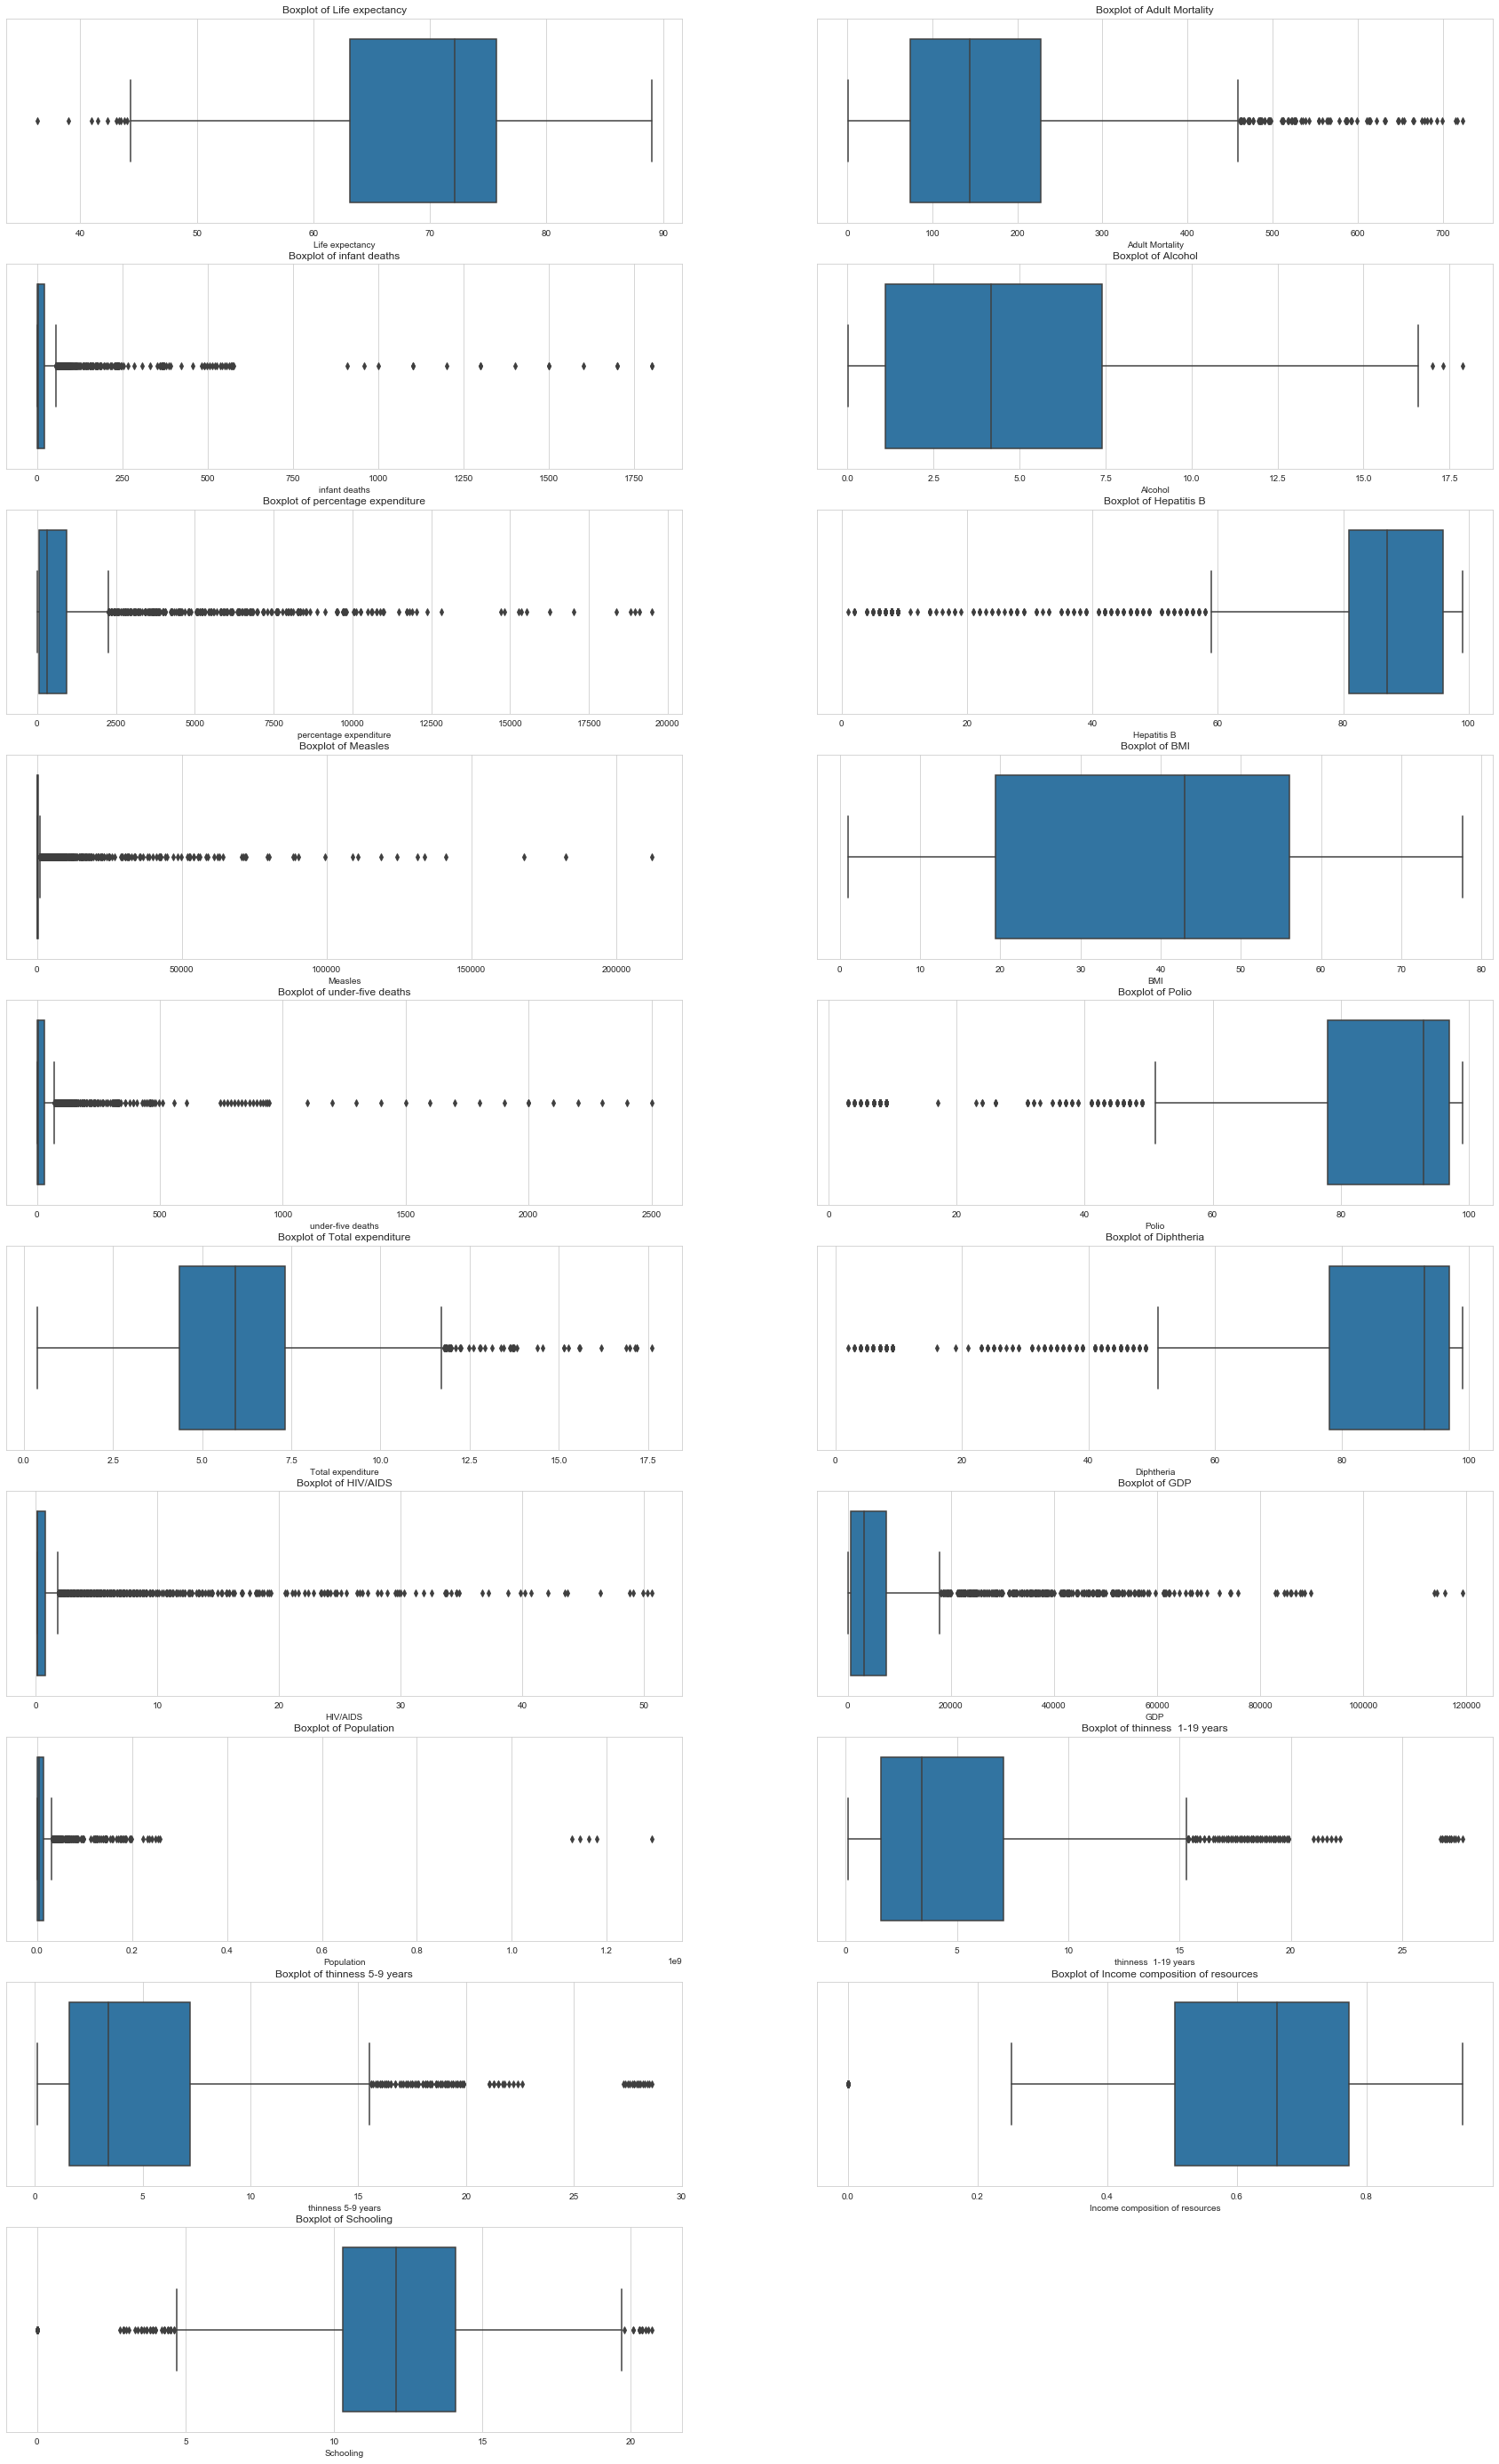

In [202]:

plt.figure(figsize=(30,50))

plt.subplot(10,2,1)
sns.boxplot(life_expectancy_c["Life expectancy"])
plt.title("Boxplot of Life expectancy")

plt.subplot(10,2,2)
sns.boxplot(life_expectancy_c["Adult Mortality"])
plt.title("Boxplot of Adult Mortality")

plt.subplot(10,2,3)
sns.boxplot(life_expectancy_c["infant deaths"])
plt.title("Boxplot of infant deaths")

plt.subplot(10,2,4)
sns.boxplot(life_expectancy_c["Alcohol"])
plt.title("Boxplot of Alcohol")

plt.subplot(10,2,5)
sns.boxplot(life_expectancy_c["percentage expenditure"])
plt.title("Boxplot of percentage expenditure")

plt.subplot(10,2,6)
sns.boxplot(life_expectancy_c["Hepatitis B"])
plt.title("Boxplot of Hepatitis B")

plt.subplot(10,2,7)
sns.boxplot(life_expectancy_c["Measles"])
plt.title("Boxplot of Measles")

plt.subplot(10,2,8)
sns.boxplot(life_expectancy_c["BMI"])
plt.title("Boxplot of BMI")

plt.subplot(10,2,9)
sns.boxplot(life_expectancy_c["under-five deaths"])
plt.title("Boxplot of under-five deaths")

plt.subplot(10,2,10)
sns.boxplot(life_expectancy_c["Polio"])
plt.title("Boxplot of Polio")

plt.subplot(10,2,11)
sns.boxplot(life_expectancy_c["Total expenditure"])
plt.title("Boxplot of Total expenditure")

plt.subplot(10,2,12)
sns.boxplot(life_expectancy_c["Diphtheria"])
plt.title("Boxplot of Diphtheria")

plt.subplot(10,2,13)
sns.boxplot(life_expectancy_c["HIV/AIDS"])
plt.title("Boxplot of HIV/AIDS")

plt.subplot(10,2,14)
sns.boxplot(life_expectancy_c["GDP"])
plt.title("Boxplot of GDP")

plt.subplot(10,2,15)
sns.boxplot(life_expectancy_c["Population"])
plt.title("Boxplot of Population")

plt.subplot(10,2,16)
sns.boxplot(life_expectancy_c["thinness  1-19 years"])
plt.title("Boxplot of thinness  1-19 years")

plt.subplot(10,2,17)
sns.boxplot(life_expectancy_c["thinness 5-9 years"])
plt.title("Boxplot of thinness 5-9 years")

plt.subplot(10,2,18)
sns.boxplot(life_expectancy_c["Income composition of resources"])
plt.title("Boxplot of Income composition of resources")

plt.subplot(10,2,19)
sns.boxplot(life_expectancy_c["Schooling"])
plt.title("Boxplot of Schooling")


plt.show()


From boxplot, we can see there is lots of outliers,

-Actually the data are from all around the world, and there is some coutries which are really under-developed or called developing and some are highly-developed/developed. I think all the outliers in the data does make sense because of there acceeibility to the needs in proper time.

But, just for further study I wan to use NumPy's percentile() method to see in total numbers of outliers, and will limit the outliers and see the differences.



First lets put all the column in a key, to use for percentile method.

In [203]:
#putting all the features in life_expkey
life_expkey= life_expectancy_c[["Life expectancy","Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", "Hepatitis B",
                                    "Measles","BMI", "under-five deaths", "Polio", "Total expenditure", "Diphtheria", "HIV/AIDS",
                                   "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years", "Income composition of resources",
                                   "Schooling"
                                    ]]

life_expkey.head()

Life expectancy  Adult Mortality  infant deaths  Alcohol  \
Country                                                                   
Afghanistan 0             65.0            263.0             62     0.01   
            1             59.9            271.0             64     0.01   
            2             59.9            268.0             66     0.01   
            3             59.5            272.0             69     0.01   
            4             59.2            275.0             71     0.01   

               percentage expenditure  Hepatitis B  Measles   BMI  \
Country                                                             
Afghanistan 0               71.279624         65.0     1154  19.1   
            1               73.523582         62.0      492  18.6   
            2               73.219243         64.0      430  18.1   
            3               78.184215         67.0     2787  17.6   
            4                7.097109         68.0     3013  17.2   

               under-five deaths  Polio  Total expenditure  Diphtheria  \
Country                                                                  
Afghanistan 0                 83    6.0               8.16        65.0   
            1                 86   58.0               8.18        62.0   
            2                 89   62.0               8.13        64.0   
            3                 93   67.0               8.52        67.0   
            4                 97   68.0               7.87        68.0   

               HIV/AIDS         GDP  Population  thinness  1-19 years  \
Country                                                                 
Afghanistan 0       0.1  584.259210  33736494.0                  17.2   
            1       0.1  612.696514    327582.0                  17.5   
            2       0.1  631.744976  31731688.0                  17.7   
            3       0.1  669.959000   3696958.0                  17.9   
            4       0.1   63.537231   2978599.0                  18.2   

               thinness 5-9 years  Income composition of resources  Schooling  
Country                                                                        
Afghanistan 0                17.3                            0.479       10.1  
            1                17.5                            0.476       10.0  
            2                17.7                            0.470        9.9  
            3                18.0                            0.463        9.8  
            4                18.2                            0.454        9.5

Now, use Tukey's Method to find the numbers of outliers:

### Tukey's method: 
Interquartile Range (IQR) method, to find out the number of outliers.

In [204]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(life_expkey, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expkey > max_val) 
                      | (life_expkey < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 9331
The score threshold is: 1.5
Number of outliers is: 8807
The score threshold is: 2.0
Number of outliers is: 8376
The score threshold is: 2.5
Number of outliers is: 8079
The score threshold is: 3.0
Number of outliers is: 7766
The score threshold is: 3.5
Number of outliers is: 7570
The score threshold is: 4.0
Number of outliers is: 7358
The score threshold is: 4.5
Number of outliers is: 7220


We can see that there is lots of outliers in different threshold, also in 1.5 it is about 8807 which is really high.

Lets, try to limit the outliers by using Winsorization method:


### Winsorization:
One way of limiting the outlier values, 

We can cap the values of the outliers by assigning them new values to see its correlation later.

In [205]:
#winsorization
from scipy.stats.mstats import winsorize

life_expectancy_c["winsorized_Life"] = winsorized_views = winsorize(life_expectancy_c["Life expectancy"], (0.05, 0.05))
life_expectancy_c["winsorized_Adult"] = winsorized_views = winsorize(life_expectancy_c["Adult Mortality"], (0.05, 0.05))
life_expectancy_c["winsorized_infant"] = winsorized_views = winsorize(life_expectancy_c["infant deaths"], (0.05, 0.05))
life_expectancy_c["winsorized_Alcohol"] = winsorized_views = winsorize(life_expectancy_c["Alcohol"], (0.05, 0.05))
life_expectancy_c["winsorized_perexp"] = winsorized_views = winsorize(life_expectancy_c["percentage expenditure"], (0.05, 0.05))
life_expectancy_c["winsorized_Hep"] = winsorized_views = winsorize(life_expectancy_c["Hepatitis B"], (0.05, 0.05))
life_expectancy_c["winsorized_Measles"] = winsorized_views = winsorize(life_expectancy_c["Measles"], (0.05, 0.05))
life_expectancy_c["winsorized_BMI"]=winsorized_views = winsorize(life_expectancy_c["BMI"], (0.05, 0.05))
life_expectancy_c["winsorized_under-five"]=winsorized_views = winsorize(life_expectancy_c["under-five deaths"], (0.05, 0.05))
life_expectancy_c["winsorized_Polio"]=winsorized_views= winsorize(life_expectancy_c["Polio"], (0.05, 0.05))
life_expectancy_c["winsorized_Totexp"]=winsorized_views= winsorize(life_expectancy_c["Total expenditure"], (0.05, 0.05))
life_expectancy_c["winsorized_Diphtheria"]=winsorized_views = winsorize(life_expectancy_c["Diphtheria"], (0.05, 0.05))
life_expectancy_c["winsorized_HIV/AIDS"]=winsorized_views = winsorize(life_expectancy_c["HIV/AIDS"], (0.05, 0.05))
life_expectancy_c["winsorized_GDP"]=winsorized_views = winsorize(life_expectancy_c["GDP"], (0.05, 0.05))
life_expectancy_c["winsorized_Pop"]=winsorized_views = winsorize(life_expectancy_c["Population"], (0.05, 0.05))
life_expectancy_c["winsorized_thin1"]=winsorized_views = winsorize(life_expectancy_c["thinness  1-19 years"], (0.05, 0.05))
life_expectancy_c["winsorized_thin5"]=winsorized_views = winsorize(life_expectancy_c["thinness 5-9 years"], (0.05, 0.05))
life_expectancy_c["winsorized_Inc"]=winsorized_views = winsorize(life_expectancy_c["Income composition of resources"], (0.05, 0.05))
life_expectancy_c["winsorized_Sch"]=winsorized_views = winsorize(life_expectancy_c["Schooling"], (0.05, 0.05))



After winsorizing the data, lets plot the winsorized data in boxplot to see, if it really limit the outliers or not?

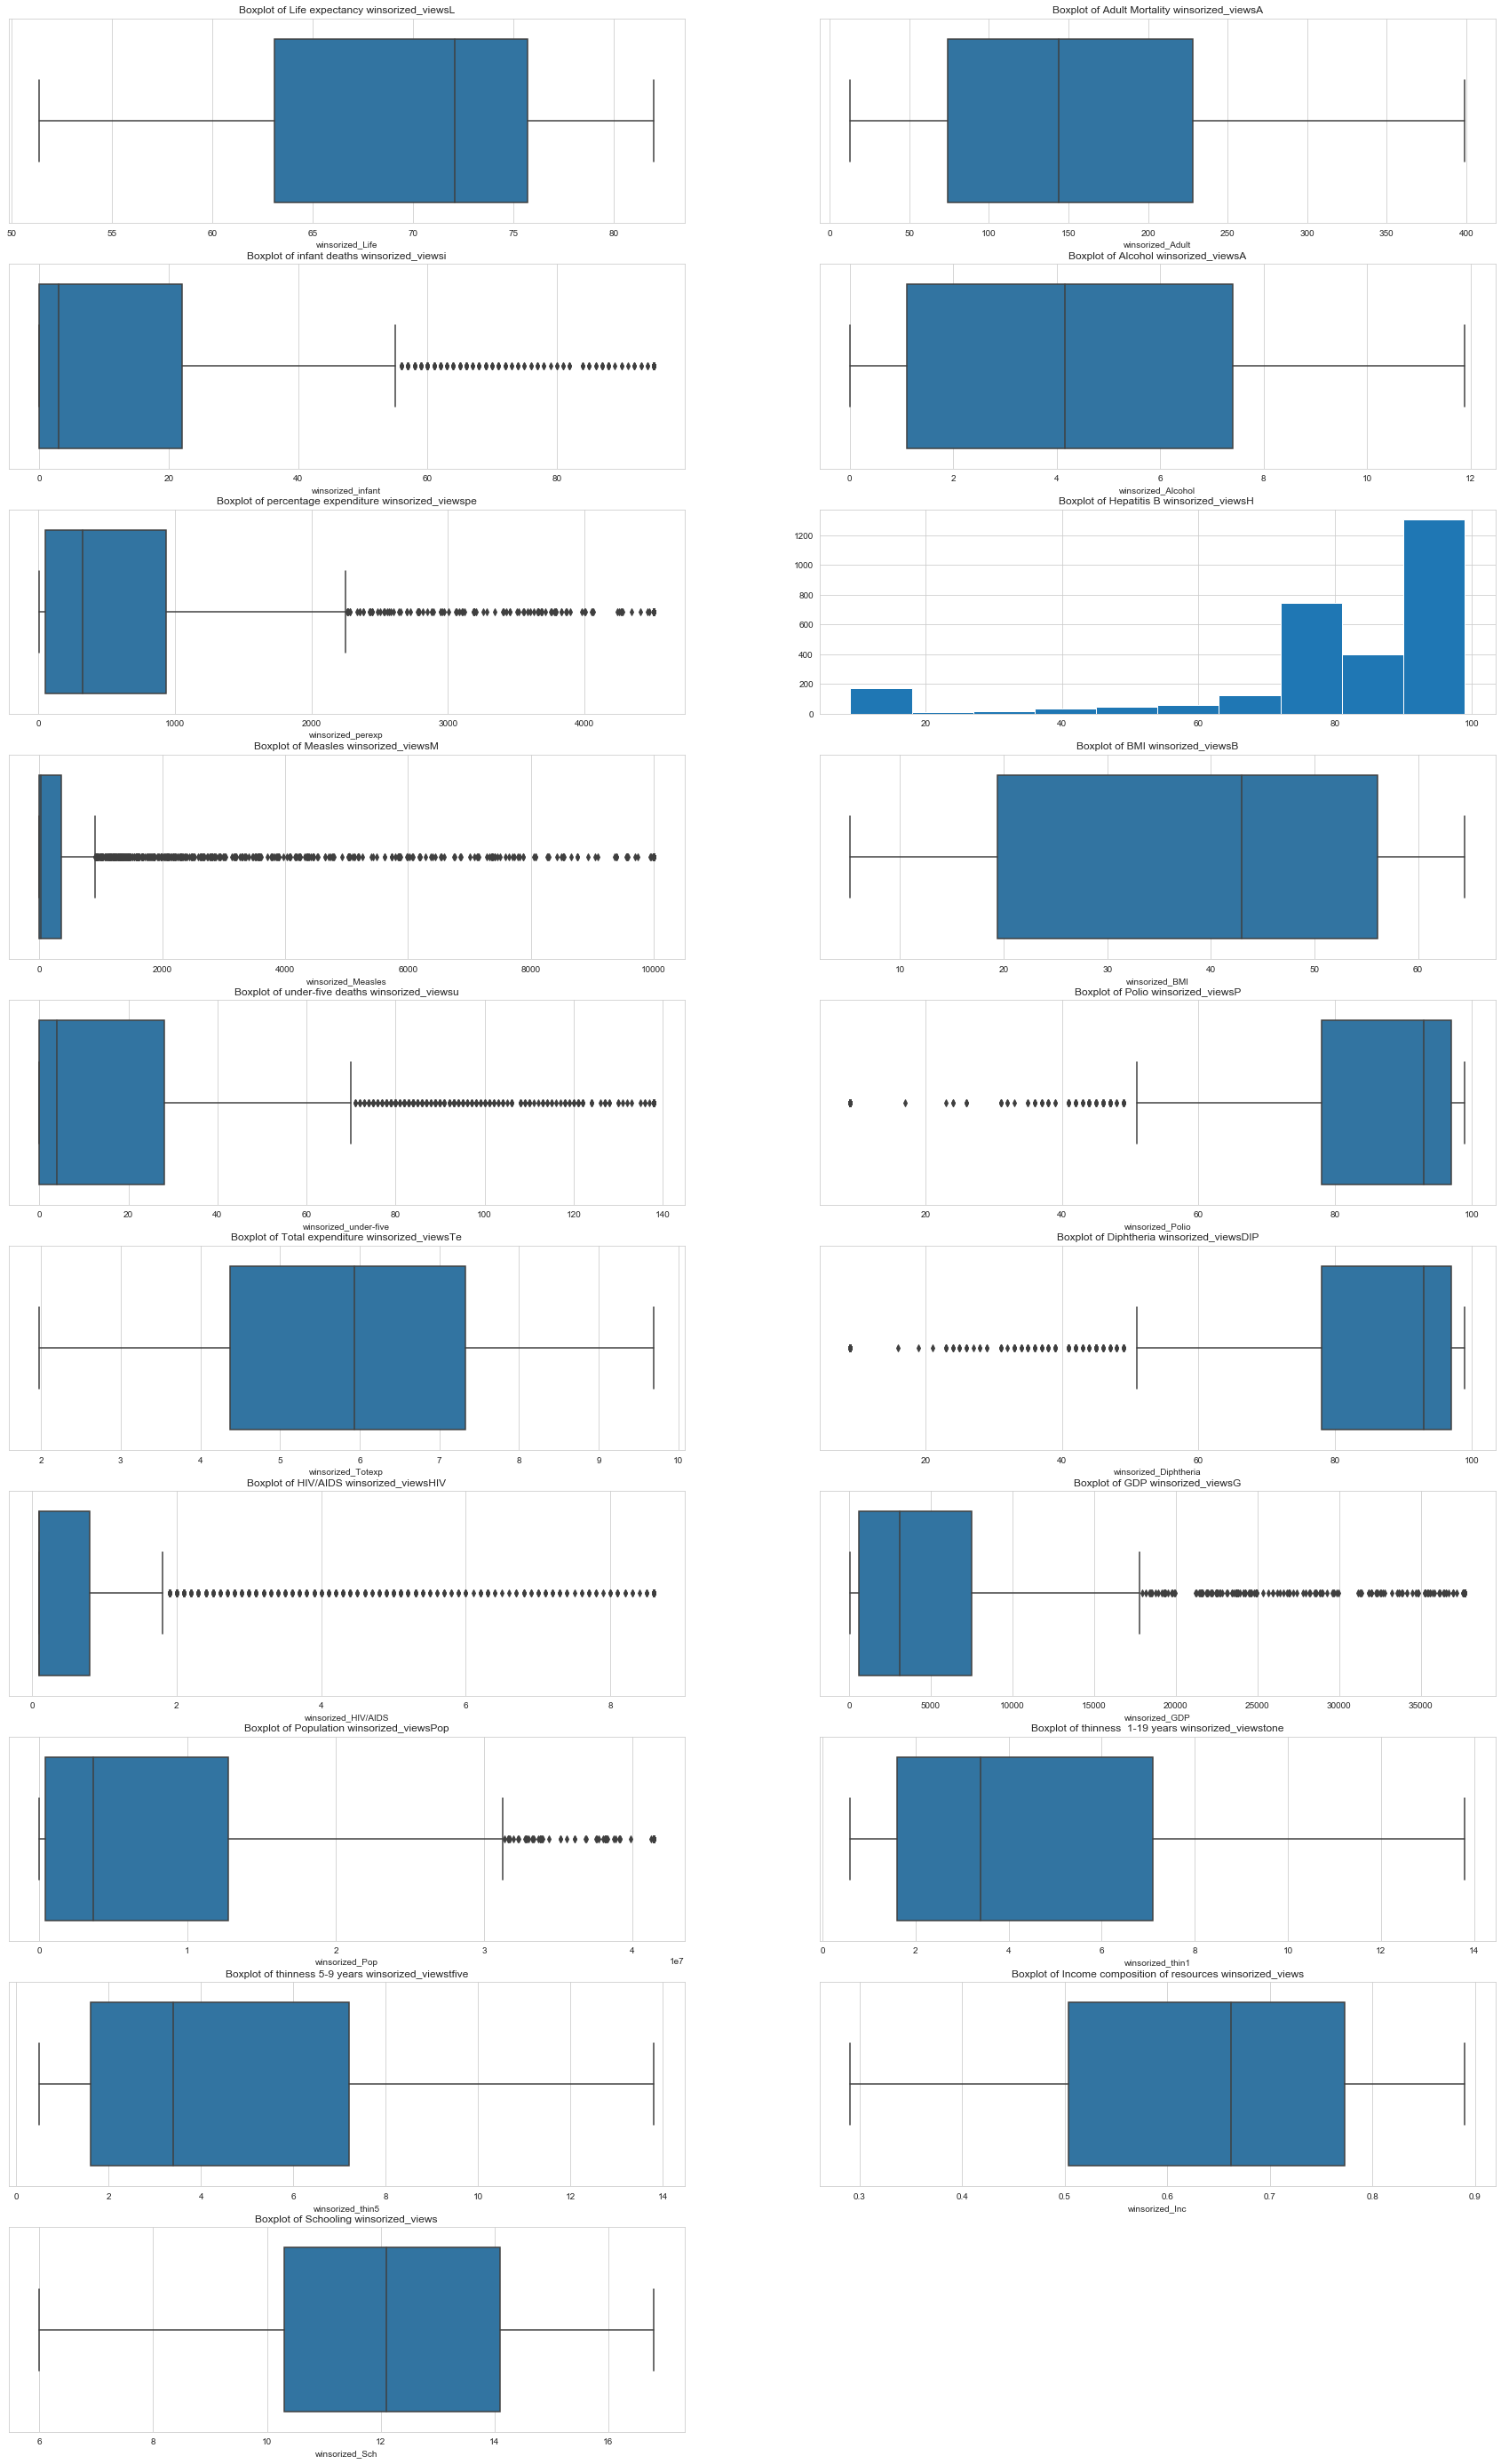

In [206]:
#plotting figure 
plt.figure(figsize=(30,50))

plt.subplot(10,2,1)
sns.boxplot(life_expectancy_c["winsorized_Life"])
plt.title("Boxplot of Life expectancy winsorized_viewsL")

plt.subplot(10,2,2)
sns.boxplot(life_expectancy_c["winsorized_Adult"])
plt.title("Boxplot of Adult Mortality winsorized_viewsA")

plt.subplot(10,2,3)
sns.boxplot(life_expectancy_c["winsorized_infant"])
plt.title("Boxplot of infant deaths winsorized_viewsi")

plt.subplot(10,2,4)
sns.boxplot(life_expectancy_c["winsorized_Alcohol"])
plt.title("Boxplot of Alcohol winsorized_viewsA")

plt.subplot(10,2,5)
sns.boxplot(life_expectancy_c["winsorized_perexp"])
plt.title("Boxplot of percentage expenditure winsorized_viewspe")

plt.subplot(10,2,6)
plt.hist(life_expectancy_c["winsorized_Hep"])
plt.title("Boxplot of Hepatitis B winsorized_viewsH ")

plt.subplot(10,2,7)
sns.boxplot(life_expectancy_c["winsorized_Measles"])
plt.title("Boxplot of Measles winsorized_viewsM")

plt.subplot(10,2,8)
sns.boxplot(life_expectancy_c["winsorized_BMI"])
plt.title("Boxplot of BMI winsorized_viewsB")

plt.subplot(10,2,9)
sns.boxplot(life_expectancy_c["winsorized_under-five"])
plt.title("Boxplot of under-five deaths winsorized_viewsu")

plt.subplot(10,2,10)
sns.boxplot(life_expectancy_c["winsorized_Polio"])
plt.title("Boxplot of Polio winsorized_viewsP")

plt.subplot(10,2,11)
sns.boxplot(life_expectancy_c["winsorized_Totexp"])
plt.title("Boxplot of Total expenditure winsorized_viewsTe")

plt.subplot(10,2,12)
sns.boxplot(life_expectancy_c["winsorized_Diphtheria"])
plt.title("Boxplot of Diphtheria winsorized_viewsDIP")

plt.subplot(10,2,13)
sns.boxplot(life_expectancy_c["winsorized_HIV/AIDS"])
plt.title("Boxplot of HIV/AIDS winsorized_viewsHIV")

plt.subplot(10,2,14)
sns.boxplot(life_expectancy_c["winsorized_GDP"])
plt.title("Boxplot of GDP winsorized_viewsG")

plt.subplot(10,2,15)
sns.boxplot(life_expectancy_c["winsorized_Pop"])
plt.title("Boxplot of Population winsorized_viewsPop")

plt.subplot(10,2,16)
sns.boxplot(life_expectancy_c["winsorized_thin1"])
plt.title("Boxplot of thinness  1-19 years winsorized_viewstone")

plt.subplot(10,2,17)
sns.boxplot(life_expectancy_c["winsorized_thin5"])
plt.title("Boxplot of thinness 5-9 years winsorized_viewstfive")

plt.subplot(10,2,18)
sns.boxplot(life_expectancy_c["winsorized_Inc"])
plt.title("Boxplot of Income composition of resources winsorized_views")

plt.subplot(10,2,19)
sns.boxplot(life_expectancy_c["winsorized_Sch"])
plt.title("Boxplot of Schooling winsorized_views")


plt.show()


After, winsorization, we can see outliers is limited to some extent.

Now Lets find by how much it decreases the number of outliers by using Tukey's method: 

In [207]:
life_exp_winskey= life_expectancy_c[["winsorized_Life", "winsorized_Adult", "winsorized_infant", "winsorized_Alcohol",
                                     "winsorized_perexp", "winsorized_Hep", "winsorized_Measles", "winsorized_BMI",
                                     "winsorized_under-five", "winsorized_Polio", "winsorized_Totexp", "winsorized_Diphtheria", 
                                     "winsorized_HIV/AIDS", "winsorized_GDP", "winsorized_Pop", "winsorized_thin1",
                                     "winsorized_thin5", "winsorized_Inc", "winsorized_Sch"
                                    ]]

# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(life_exp_winskey, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_exp_winskey > max_val) 
                      | (life_exp_winskey < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 9149
The score threshold is: 1.5
Number of outliers is: 8652
The score threshold is: 2.0
Number of outliers is: 8250
The score threshold is: 2.5
Number of outliers is: 7972
The score threshold is: 3.0
Number of outliers is: 7691
The score threshold is: 3.5
Number of outliers is: 7371
The score threshold is: 4.0
Number of outliers is: 7233
The score threshold is: 4.5
Number of outliers is: 7132


As, we can see there is little difference in number of outliers capped.

Now, Lets move to the data exploration,

### Data Exploration:


Lets see the correlation between al the features to life expectancy:

In [208]:
life_expectancy_c.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044669,0.073568,0.090739,-0.081840,0.104094,-0.041980,...,0.094382,0.073920,0.134524,-0.115567,0.083305,0.041742,-0.046755,-0.046353,0.205682,0.198448
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.392420,0.385580,0.204566,-0.157586,0.562453,-0.222529,...,0.463608,0.227812,0.477770,-0.713769,0.474516,0.013084,-0.531418,-0.531750,0.789740,0.748563
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.190791,-0.237427,-0.139146,0.031176,-0.383641,0.094146,...,-0.274199,-0.116962,-0.274775,0.594015,-0.304671,-0.006769,0.349059,0.358280,-0.508086,-0.451109
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.114806,-0.091971,-0.179724,0.501038,-0.227427,0.996628,...,-0.171782,-0.139726,-0.176183,0.072746,-0.123498,0.254805,0.299030,0.298178,-0.174328,-0.213021
Alcohol,-0.044669,0.392420,-0.190791,-0.114806,1.000000,0.348026,0.074245,-0.051786,0.325939,-0.111781,...,0.214843,0.324401,0.216355,-0.091680,0.351555,-0.016978,-0.447247,-0.438424,0.476307,0.525754
percentage expenditure,0.073568,0.385580,-0.237427,-0.091971,0.348026,1.000000,0.014247,-0.057454,0.237435,-0.094674,...,0.150658,0.193558,0.144913,-0.159890,0.821983,0.000768,-0.278565,-0.284254,0.427387,0.398470
Hepatitis B,0.090739,0.204566,-0.139146,-0.179724,0.074245,0.014247,1.000000,-0.090827,0.139102,-0.185377,...,0.408905,0.067410,0.500311,-0.142606,0.069170,-0.042245,-0.091166,-0.095513,0.183045,0.188072
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.051786,-0.057454,-0.090827,1.000000,-0.176019,0.507718,...,-0.136775,-0.111957,-0.142879,0.080286,-0.075488,0.110348,0.184885,0.181962,-0.121398,-0.132611
BMI,0.104094,0.562453,-0.383641,-0.227427,0.325939,0.237435,0.139102,-0.176019,1.000000,-0.237833,...,0.285856,0.232576,0.284635,-0.385021,0.311938,-0.018749,-0.557504,-0.567865,0.554725,0.551717
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.111781,-0.094674,-0.185377,0.507718,-0.237833,1.000000,...,-0.189830,-0.141178,-0.196736,0.096543,-0.127824,0.255443,0.309146,0.307330,-0.192838,-0.228461


Life expectancy is highly correlated to Schooling and Income composition of resources, and is negatively correlated to Adult mortality, HIV/AIDS, thinness 1-19 years, thinness 5-9 years, little bit to infant deaths, Measles, under-five deaths, and Population.

From the table, under five death is higly correlated to infant death, percentage expenditure is highly correlated to GDP, thinness 1-19 years is highly correlated to thinness 5-9 years,and Schooling and Income composition of resources is highly correlated to each others.


After capping outliers, correlation with life expectancy of all other features is little different now, like Adult mortality decreases, infant death relation increases, under-five death increases, HIV/AIDS went really high.

### Visualization of Correlation of all features: Using Heatmap

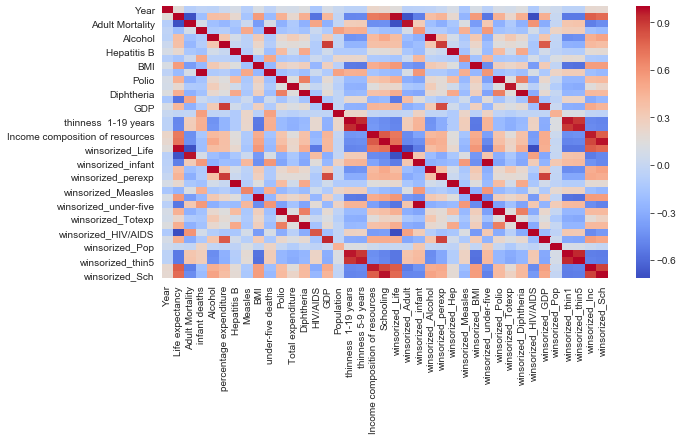

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(life_expectancy_cg.corr(),cmap='coolwarm')

Lets, see statistical description:

### Describe:

In [209]:
# Statistical decription after fixing missing values and outliers
life_expectancy_c.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,933.531623,80.960842,2427.855874,38.235394,42.179303,...,82.633681,5.856905,82.410214,1.172439,6655.630007,8.253349e+06,4.665717,4.669845,0.639442,12.039461
std,4.61056,9.523867,124.292079,118.114450,3.914923,1954.665706,22.531361,11485.970937,19.850184,160.700547,...,23.063088,2.097285,23.345420,2.259797,9692.490159,1.057540e+07,3.751267,3.766405,0.169871,2.880872
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.099872,1.000000,0.000000,1.000000,0.000000,...,9.000000,1.980000,9.000000,0.100000,81.683884,1.492800e+04,0.600000,0.500000,0.291000,6.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,50.746302,80.960842,0.000000,19.400000,0.000000,...,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,322.177866,87.000000,17.000000,43.000000,4.000000,...,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,933.531623,96.000000,362.250000,56.100000,28.000000,...,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,...,99.000000,9.690000,99.000000,8.600000,37698.785730,4.143156e+07,13.800000,13.800000,0.890000,16.800000


Now, there is only 2928 rows instead of 2938 after dropping few rows. 

Percentage expenditure's minimum value is some decimal than 0.

Some of the feature's outliers went down after winsorization.

#### Text-Based Description:

In [211]:
# descriptive statistics for just text-based variables
life_expectancy_c.describe(include=['O'])

,Country,Status
count,2928,2928
unique,183,2
top,Botswana,Developing
freq,16,2416


#### For All type of variables Description:

In [212]:
# descriptive statistics for all variables
life_expectancy_c.describe(include= 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
count,2928,2928.00000,2928,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
unique,183,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Botswana,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.50000,NaN,69.224932,164.796448,30.407445,4.614856,933.531623,80.960842,2427.855874,...,82.633681,5.856905,82.410214,1.172439,6655.630007,8.253349e+06,4.665717,4.669845,0.639442,12.039461
std,NaN,4.61056,NaN,9.523867,124.292079,118.114450,3.914923,1954.665706,22.531361,11485.970937,...,23.063088,2.097285,23.345420,2.259797,9692.490159,1.057540e+07,3.751267,3.766405,0.169871,2.880872
min,NaN,2000.00000,NaN,36.300000,1.000000,0.000000,0.010000,0.099872,1.000000,0.000000,...,9.000000,1.980000,9.000000,0.100000,81.683884,1.492800e+04,0.600000,0.500000,0.291000,6.000000
25%,NaN,2003.75000,NaN,63.100000,74.000000,0.000000,1.107500,50.746302,80.960842,0.000000,...,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,NaN,2007.50000,NaN,72.100000,144.000000,3.000000,4.160000,322.177866,87.000000,17.000000,...,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,NaN,2011.25000,NaN,75.700000,228.000000,22.000000,7.400000,933.531623,96.000000,362.250000,...,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000


### Visualization for categorical variable: Status


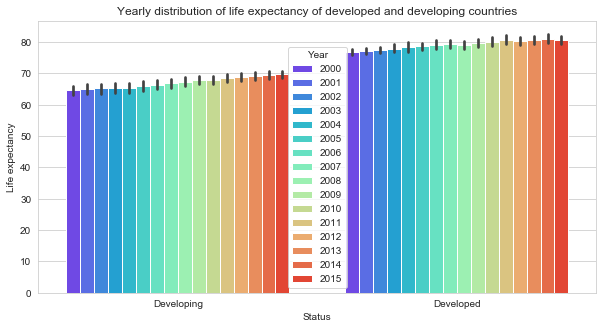

Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy, dtype: float64


In [224]:
# bar chart of status and life-expectancy
plt.figure(figsize=(10,5))
sns.barplot(life_expectancy_c['Status'], life_expectancy_c['Life expectancy'], hue=life_expectancy_c['Year'], palette='rainbow')
plt.title('Yearly distribution of life expectancy of developed and developing countries' )
plt.show()
print(life_expectancy_c.groupby('Status')['Life expectancy'].mean())

Developed countries have higher life expectancy than developing countries and it is increasing every year.

#### Bivariate analysis: Continuous vs. Continuous

To see the relationship between life expectancy and all other features, we will ise scatterplot for visualization:

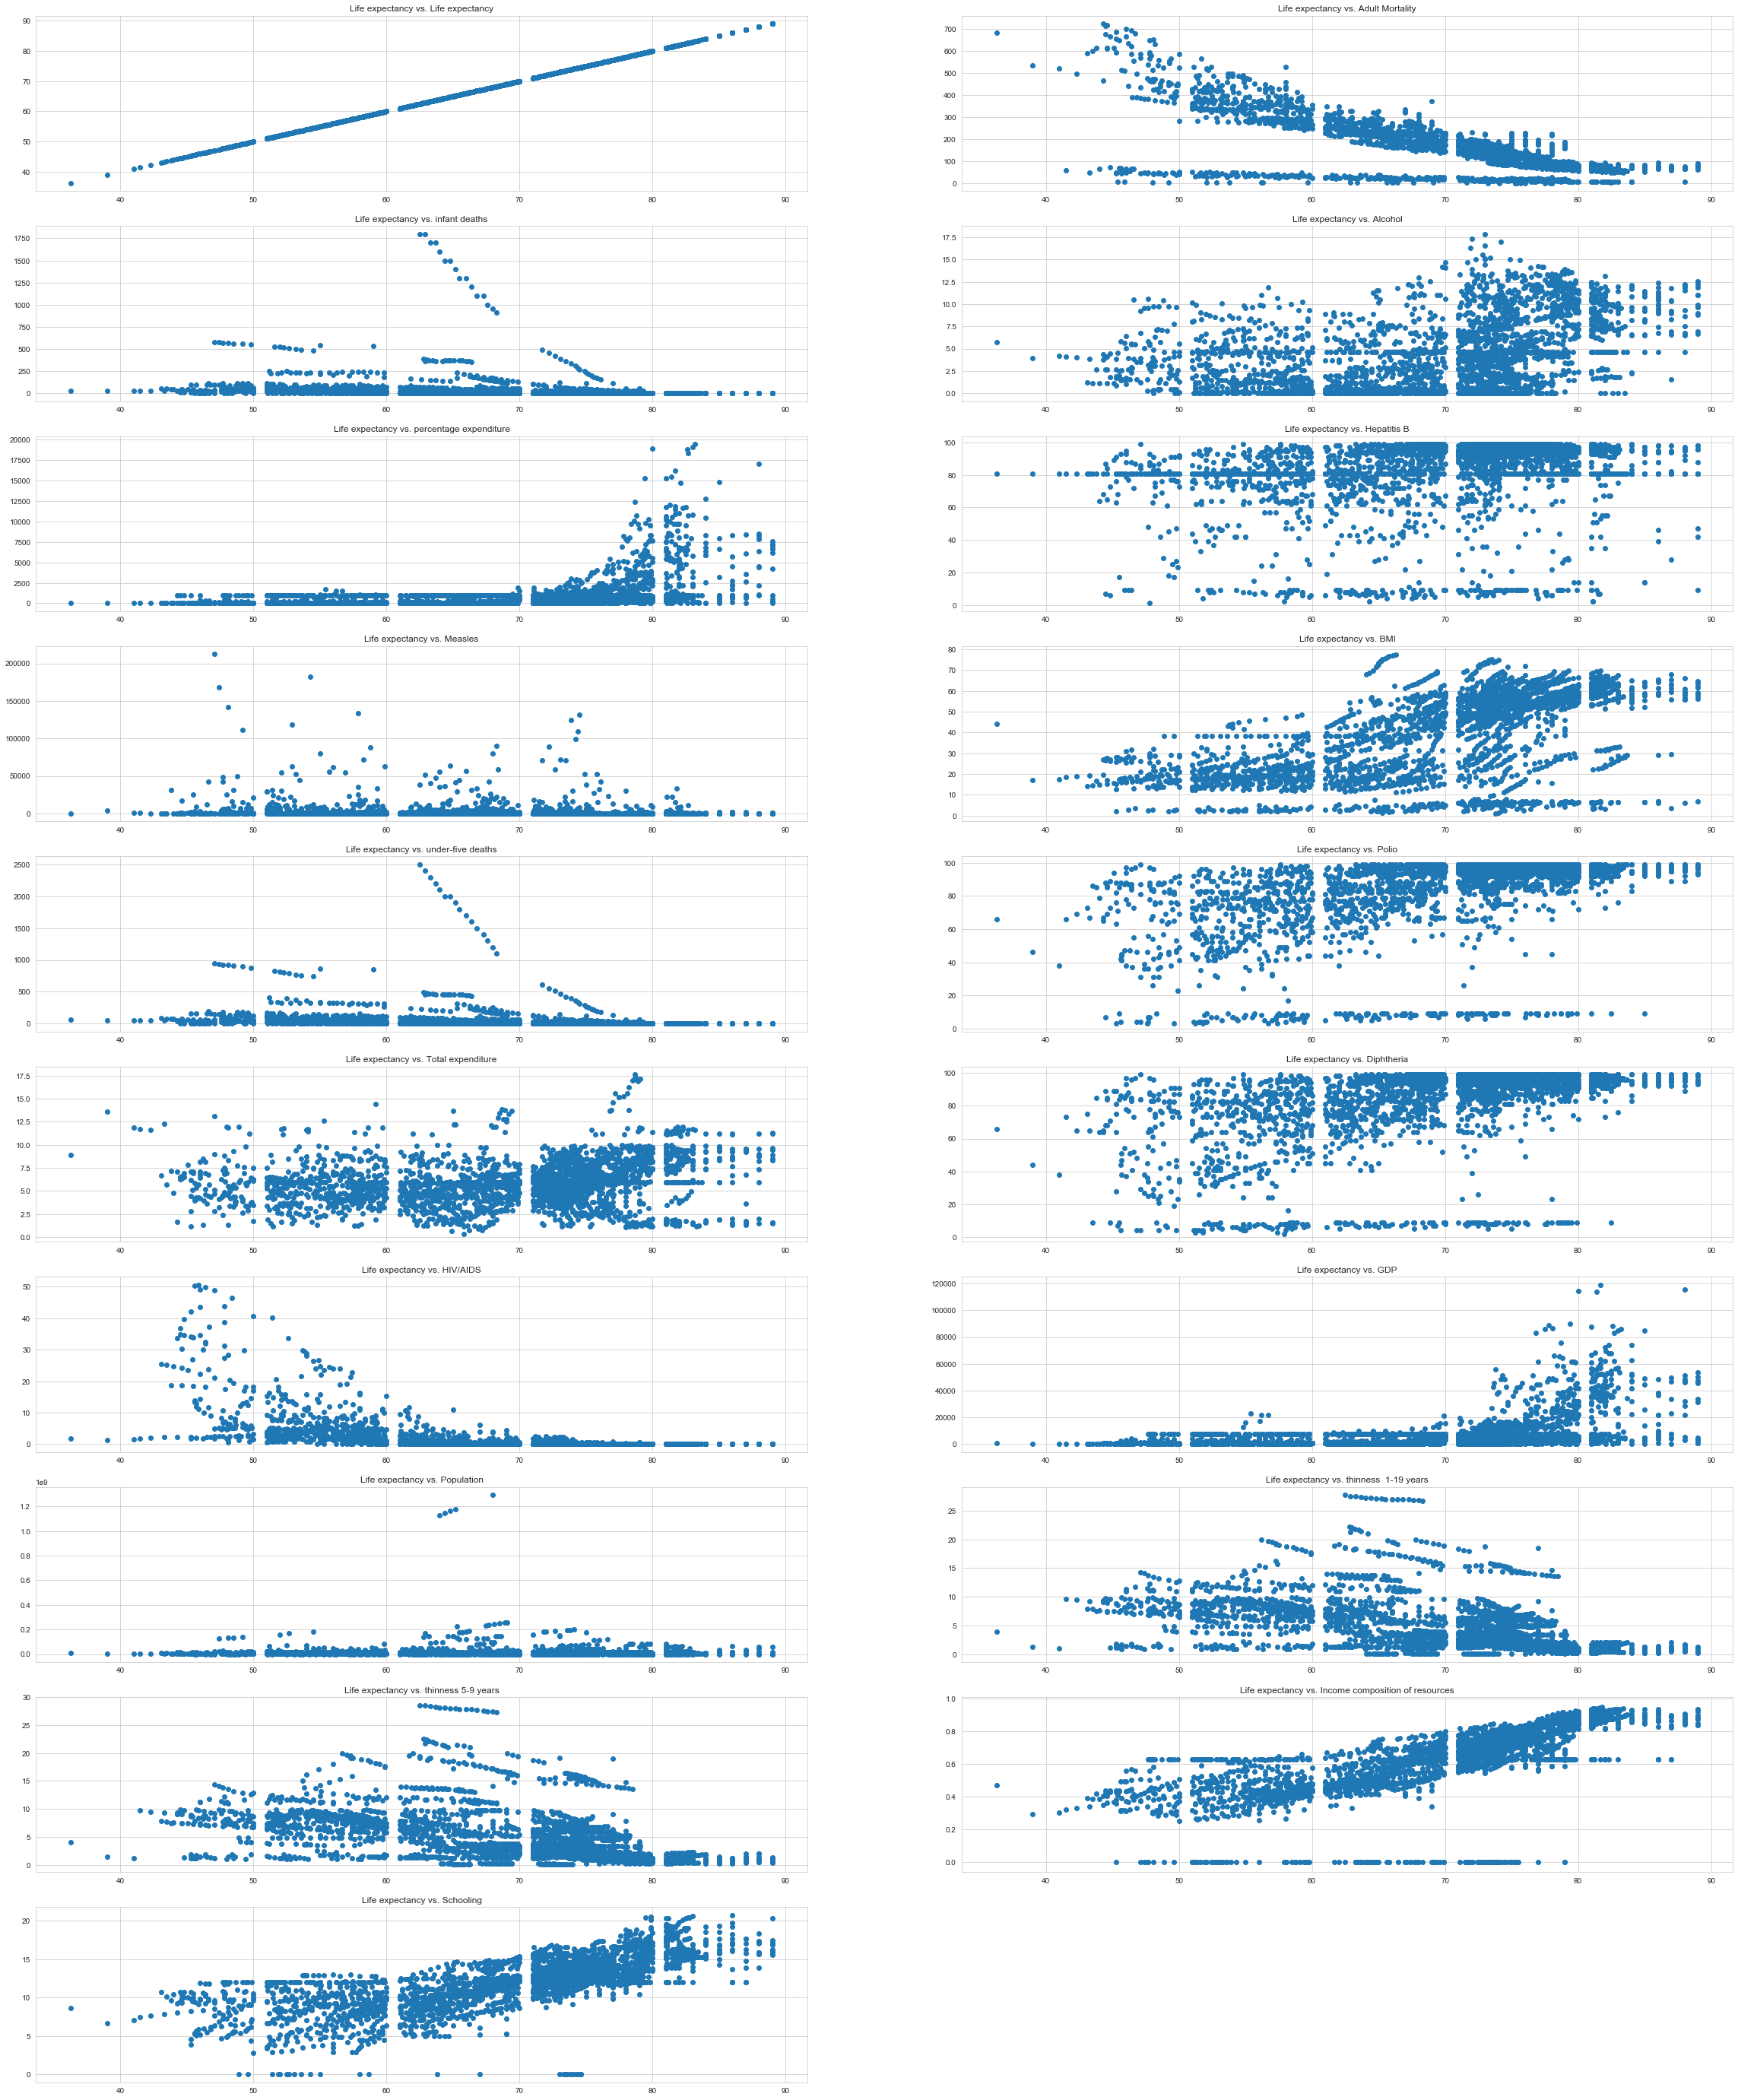

In [215]:
#plotting figure
plt.figure(figsize=(40,50))

#subplots of scatteplot
plt.subplot(10,2,1)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Life expectancy"])
plt.title("Life expectancy vs. Life expectancy")

plt.subplot(10,2,2)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Adult Mortality"])
plt.title("Life expectancy vs. Adult Mortality")

plt.subplot(10,2,3)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["infant deaths"])
plt.title("Life expectancy vs. infant deaths")

plt.subplot(10,2,4)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Alcohol"])
plt.title("Life expectancy vs. Alcohol")

plt.subplot(10,2,5)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["percentage expenditure"])
plt.title("Life expectancy vs. percentage expenditure")

plt.subplot(10,2,6)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Hepatitis B"])
plt.title("Life expectancy vs. Hepatitis B")

plt.subplot(10,2,7)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Measles"])
plt.title("Life expectancy vs. Measles")

plt.subplot(10,2,8)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["BMI"])
plt.title("Life expectancy vs. BMI")

plt.subplot(10,2,9)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["under-five deaths"])
plt.title("Life expectancy vs. under-five deaths")

plt.subplot(10,2,10)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Polio"])
plt.title("Life expectancy vs. Polio")

plt.subplot(10,2,11)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Total expenditure"])
plt.title("Life expectancy vs. Total expenditure")

plt.subplot(10,2,12)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Diphtheria"])
plt.title("Life expectancy vs. Diphtheria")

plt.subplot(10,2,13)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["HIV/AIDS"])
plt.title("Life expectancy vs. HIV/AIDS")

plt.subplot(10,2,14)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["GDP"])
plt.title("Life expectancy vs. GDP")

plt.subplot(10,2,15)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Population"])
plt.title("Life expectancy vs. Population")

plt.subplot(10,2,16)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["thinness  1-19 years"])
plt.title("Life expectancy vs. thinness  1-19 years")

plt.subplot(10,2,17)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["thinness 5-9 years"])
plt.title("Life expectancy vs. thinness 5-9 years")

plt.subplot(10,2,18)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Income composition of resources"])
plt.title("Life expectancy vs. Income composition of resources")

plt.subplot(10,2,19)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Schooling"])
plt.title("Life expectancy vs. Schooling")


plt.show()


As we can see from scatterplot, Life expectancy and Adult Mortality showing negative relationship, Life expectancy and Alcohol got little positive relationship, Life expectancy and percentage expenditure has no relation at first but after certain expectancy it is positively radiated, Schooling and Income shows thick but positive relationship with life expectancy, Population shows no relation at all with life expectancy.

### Feature engineering:

Box-Cox, log, and square root transformations only work when all datapoints are positive.

Normality Check using jarque-bera:

 Box-Cox transformation, another common way to make variables normally distributed.

from scipy.stats import boxcox

Life_expectancy_boxcox,_ = boxcox(life_expectancy_c["Life expectancy"])
Adult_Mortality_boxcox,_ = boxcox(life_expectancy_c["Adult Mortality"])
infant_deaths_boxcox,_ = boxcox(life_expectancy_c["infant deaths"])
Alcohol_boxcox,_ = boxcox(life_expectancy_c["Alcohol"])
percentage_expenditure_boxcox,_ = boxcox(life_expectancy_c["percentage expenditure"])
Hepatitis_B_boxcox,_ = boxcox(life_expectancy_c["Hepatitis B"])
Measles_boxcox,_ = boxcox(life_expectancy_c["Measles"])
BMI_boxcox,_ = boxcox(life_expectancy_c["BMI"])
under_five_deaths_boxcox,_ = boxcox(life_expectancy_c["under-five deaths"])
Polio_boxcox,_ = boxcox(life_expectancy_c["Polio"])
Total_expenditure_boxcox,_ = boxcox(life_expectancy_c["Total expenditure"])
Diphtheria_boxcox,_ = boxcox(life_expectancy_c["Diphtheria"])
HIV_AIDS_boxcox,_ = boxcox(life_expectancy_c["HIV/AIDS"])
GDP_boxcox,_ = boxcox(life_expectancy_c["GDP"])
Population_boxcox,_ = boxcox(life_expectancy_c["Population"])
thinness_1_19_years_boxcox,_ = boxcox(life_expectancy_c["thinness  1-19 years"])
thinness_5_9_years_boxcox,_ = boxcox(life_expectancy_c["thinness 5-9 years"])
Income_composition_of_resources_boxcox,_ = boxcox(life_expectancy_c["Income composition of resources"])
Schooling_boxcox,_ = boxcox(life_expectancy_c["Schooling"])



# histograms of the box-cox transformed data
plt.figure(figsize=(30,40))

plt.subplot(10,2,1)
plt.hist(Life_expectancy_boxcox)
plt.title("Histogram of Life expectancy")

plt.subplot(10,2,2)
plt.hist(Adult_Mortality_boxcox)
plt.title("Histogram of Adult Mortality")

plt.subplot(10,2,3)
plt.hist(infant_deaths_boxcox)
plt.title("Histogram of infant deaths")

plt.subplot(10,2,4)
plt.hist(Alcohol_boxcox)
plt.title("Histogram of Alcohol")

plt.subplot(10,2,5)
plt.hist(percentage_expenditure_boxcox)
plt.title("Histogram of percentage expenditure")

plt.subplot(10,2,6)
plt.hist(Hepatitis_B_boxcox)
plt.title("Histogram of Hepatitis B")

plt.subplot(10,2,7)
plt.hist(Measles_boxcox)
plt.title("Histogram of Measles")

plt.subplot(10,2,8)
plt.hist(BMI_boxcox)
plt.title("Histogram of BMI")

plt.subplot(10,2,9)
plt.hist(under_five_deaths_boxcox)
plt.title("Histogram of under-five deaths")

plt.subplot(10,2,10)
plt.hist(Polio_boxcox)
plt.title("Histogram of Polio")

plt.subplot(10,2,11)
plt.hist(Total_expenditure_boxcox)
plt.title("Histogram of Total expenditure")

plt.subplot(10,2,12)
plt.hist(Diphtheria_boxcox)
plt.title("Histogram of Diphtheria")

plt.subplot(10,2,13)
plt.hist(HIV_AIDS_boxcox)
plt.title("Histogram of HIV/AIDS")

plt.subplot(10,2,14)
plt.hist(GDP_boxcox)
plt.title("Histogram of GDP")

plt.subplot(10,2,15)
plt.hist(Population_boxcox)
plt.title("Histogram of Population")

plt.subplot(10,2,16)
plt.hist(thinness_1_19_years_boxcox)
plt.title("Histogram of thinness  1-19 years")

plt.subplot(10,2,17)
plt.hist(thinness_5_9_years_boxcox)
plt.title("Histogram of thinness 5-9 years")

plt.subplot(10,2,18)
plt.hist(Income_composition_of_resources_boxcox)
plt.title("Histogram of Income composition of resources")

plt.subplot(10,2,19)
plt.hist(Schooling_boxcox)
plt.title("Histogram of Schooling")


plt.show()


### Normalization and standardization:

Normalization of a variable into the [0,1] range (including 0 and 1).
Standardization of a variable so its mean becomes 0 and its standard deviation becomes 1.

### Normalization:

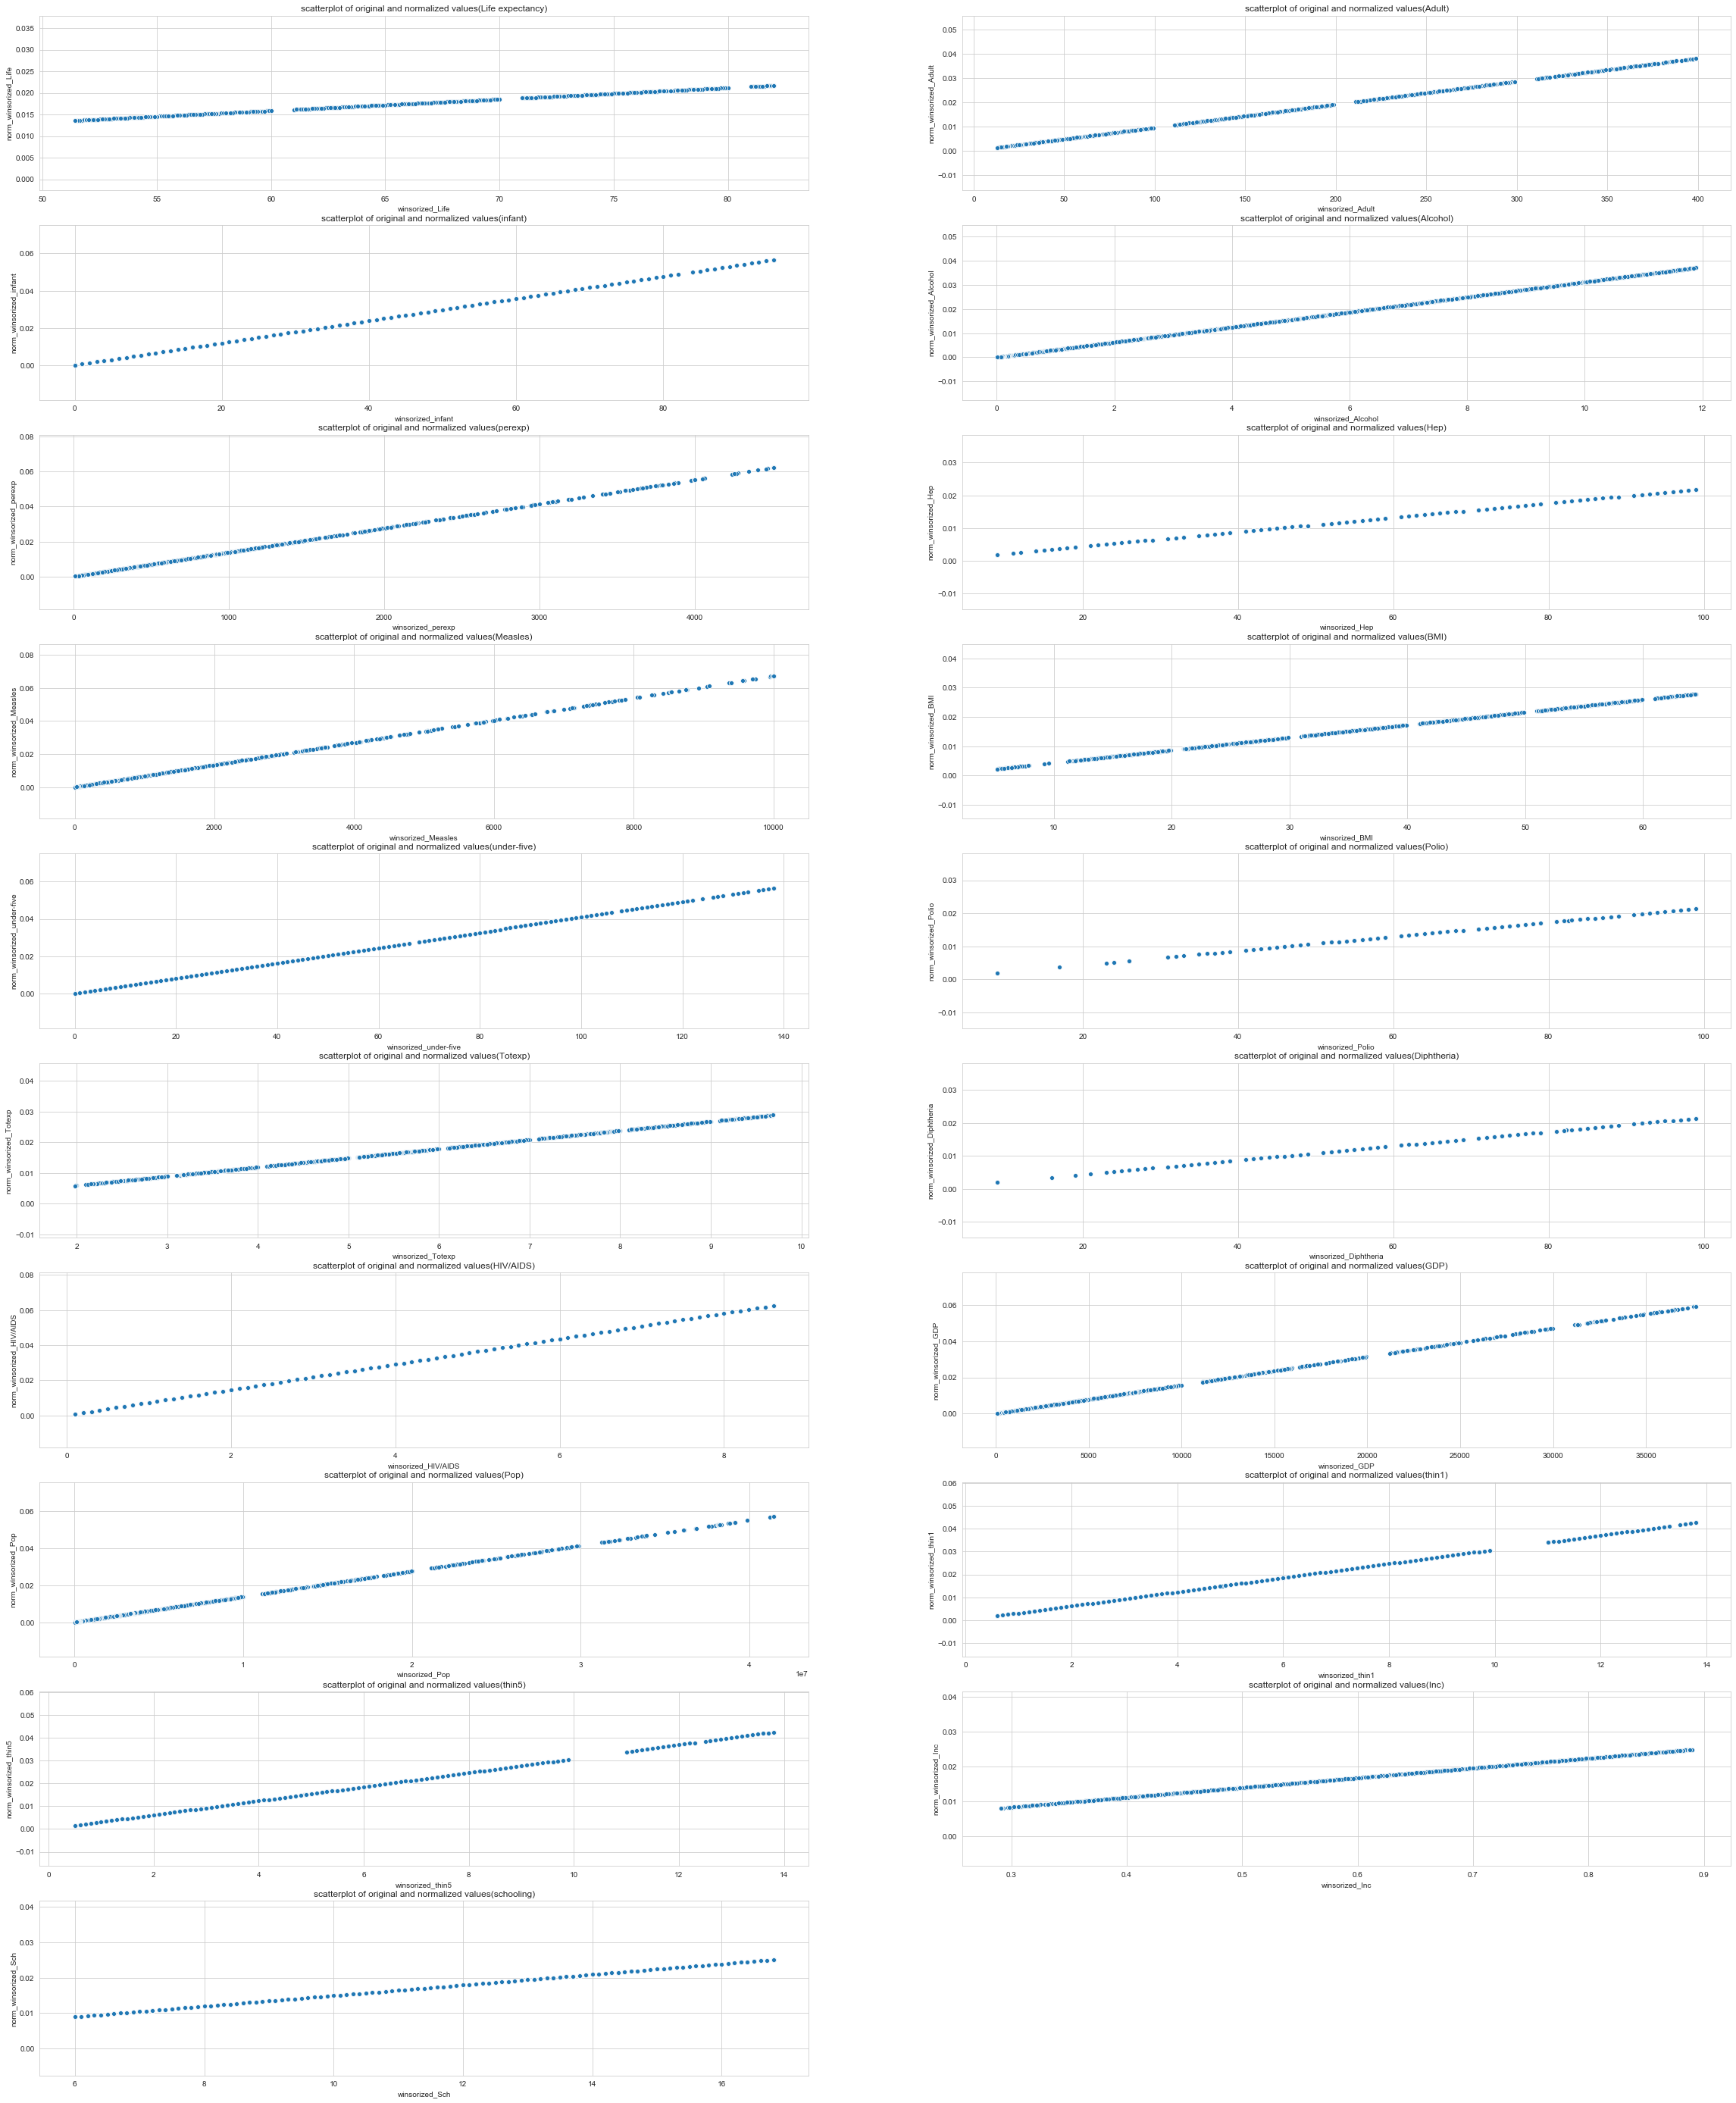

In [217]:
from sklearn.preprocessing import normalize

# normalize the winsorized variables(rescaling)

life_expectancy_c["norm_winsorized_Life"] = normalize(np.array(life_expectancy_c["winsorized_Life"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Adult"] = normalize(np.array(life_expectancy_c["winsorized_Adult"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_infant"] =  normalize(np.array(life_expectancy_c["winsorized_infant"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Alcohol"] = normalize(np.array(life_expectancy_c["winsorized_Alcohol"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_perexp"] = normalize(np.array(life_expectancy_c["winsorized_perexp"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Hep"] = normalize(np.array(life_expectancy_c["winsorized_Hep"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Measles"] = normalize(np.array(life_expectancy_c["winsorized_Measles"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_BMI"]= normalize(np.array(life_expectancy_c["winsorized_BMI"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_under-five"]= normalize(np.array(life_expectancy_c["winsorized_under-five"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Polio"]= normalize(np.array(life_expectancy_c["winsorized_Polio"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Totexp"]= normalize(np.array(life_expectancy_c["winsorized_Totexp"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Diphtheria"]= normalize(np.array(life_expectancy_c["winsorized_Diphtheria"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_HIV/AIDS"]= normalize(np.array(life_expectancy_c["winsorized_HIV/AIDS"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_GDP"]= normalize(np.array(life_expectancy_c["winsorized_GDP"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Pop"]= normalize(np.array(life_expectancy_c["winsorized_Pop"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_thin1"]= normalize(np.array(life_expectancy_c["winsorized_thin1"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_thin5"]= normalize(np.array(life_expectancy_c["winsorized_thin5"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Inc"]= normalize(np.array(life_expectancy_c["winsorized_Inc"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_c["norm_winsorized_Sch"]= normalize(np.array(life_expectancy_c["winsorized_Sch"]).reshape(1,-1)).reshape(-1,1)



plt.figure(figsize=(40,50))

# draw the scatter plot using seaborn.
plt.subplot(10,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Life"], life_expectancy_c["norm_winsorized_Life"])
plt.title("scatterplot of original and normalized values(Life expectancy)")

plt.subplot(10,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Adult"], life_expectancy_c["norm_winsorized_Adult"])
plt.title("scatterplot of original and normalized values(Adult)")

plt.subplot(10,2,3)
sns.scatterplot(life_expectancy_c["winsorized_infant"], life_expectancy_c["norm_winsorized_infant"])
plt.title("scatterplot of original and normalized values(infant)")

plt.subplot(10,2,4)
sns.scatterplot(life_expectancy_c["winsorized_Alcohol"], life_expectancy_c["norm_winsorized_Alcohol"])
plt.title("scatterplot of original and normalized values(Alcohol)")

plt.subplot(10,2,5)
sns.scatterplot(life_expectancy_c["winsorized_perexp"], life_expectancy_c["norm_winsorized_perexp"])
plt.title("scatterplot of original and normalized values(perexp)")

plt.subplot(10,2,6)
sns.scatterplot(life_expectancy_c["winsorized_Hep"], life_expectancy_c["norm_winsorized_Hep"])
plt.title("scatterplot of original and normalized values(Hep)")

plt.subplot(10,2,7)
sns.scatterplot(life_expectancy_c["winsorized_Measles"], life_expectancy_c["norm_winsorized_Measles"])
plt.title("scatterplot of original and normalized values(Measles)")

plt.subplot(10,2,8)
sns.scatterplot(life_expectancy_c["winsorized_BMI"], life_expectancy_c["norm_winsorized_BMI"])
plt.title("scatterplot of original and normalized values(BMI)")


plt.subplot(10,2,9)
sns.scatterplot(life_expectancy_c["winsorized_under-five"], life_expectancy_c["norm_winsorized_under-five"])
plt.title("scatterplot of original and normalized values(under-five)")

plt.subplot(10,2,10)
sns.scatterplot(life_expectancy_c["winsorized_Polio"], life_expectancy_c["norm_winsorized_Polio"])
plt.title("scatterplot of original and normalized values(Polio)")


plt.subplot(10,2,11)
sns.scatterplot(life_expectancy_c["winsorized_Totexp"], life_expectancy_c["norm_winsorized_Totexp"])
plt.title("scatterplot of original and normalized values(Totexp)")


plt.subplot(10,2,12)
sns.scatterplot(life_expectancy_c["winsorized_Diphtheria"], life_expectancy_c["norm_winsorized_Diphtheria"])
plt.title("scatterplot of original and normalized values(Diphtheria)")

plt.subplot(10,2,13)
sns.scatterplot(life_expectancy_c["winsorized_HIV/AIDS"], life_expectancy_c["norm_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and normalized values(HIV/AIDS)")

plt.subplot(10,2,14)
sns.scatterplot(life_expectancy_c["winsorized_GDP"], life_expectancy_c["norm_winsorized_GDP"])
plt.title("scatterplot of original and normalized values(GDP)")


plt.subplot(10,2,15)
sns.scatterplot(life_expectancy_c["winsorized_Pop"], life_expectancy_c["norm_winsorized_Pop"])
plt.title("scatterplot of original and normalized values(Pop)")


plt.subplot(10,2,16)
sns.scatterplot(life_expectancy_c["winsorized_thin1"], life_expectancy_c["norm_winsorized_thin1"])
plt.title("scatterplot of original and normalized values(thin1)")


plt.subplot(10,2,17)
sns.scatterplot(life_expectancy_c["winsorized_thin5"], life_expectancy_c["norm_winsorized_thin5"])
plt.title("scatterplot of original and normalized values(thin5)")


plt.subplot(10,2,18)
sns.scatterplot(life_expectancy_c["winsorized_Inc"], life_expectancy_c["norm_winsorized_Inc"])
plt.title("scatterplot of original and normalized values(Inc)")

plt.subplot(10,2,19)
sns.scatterplot(life_expectancy_c["winsorized_Sch"], life_expectancy_c["norm_winsorized_Sch"])
plt.title("scatterplot of original and normalized values(schooling)")




plt.show()

### Standardization:

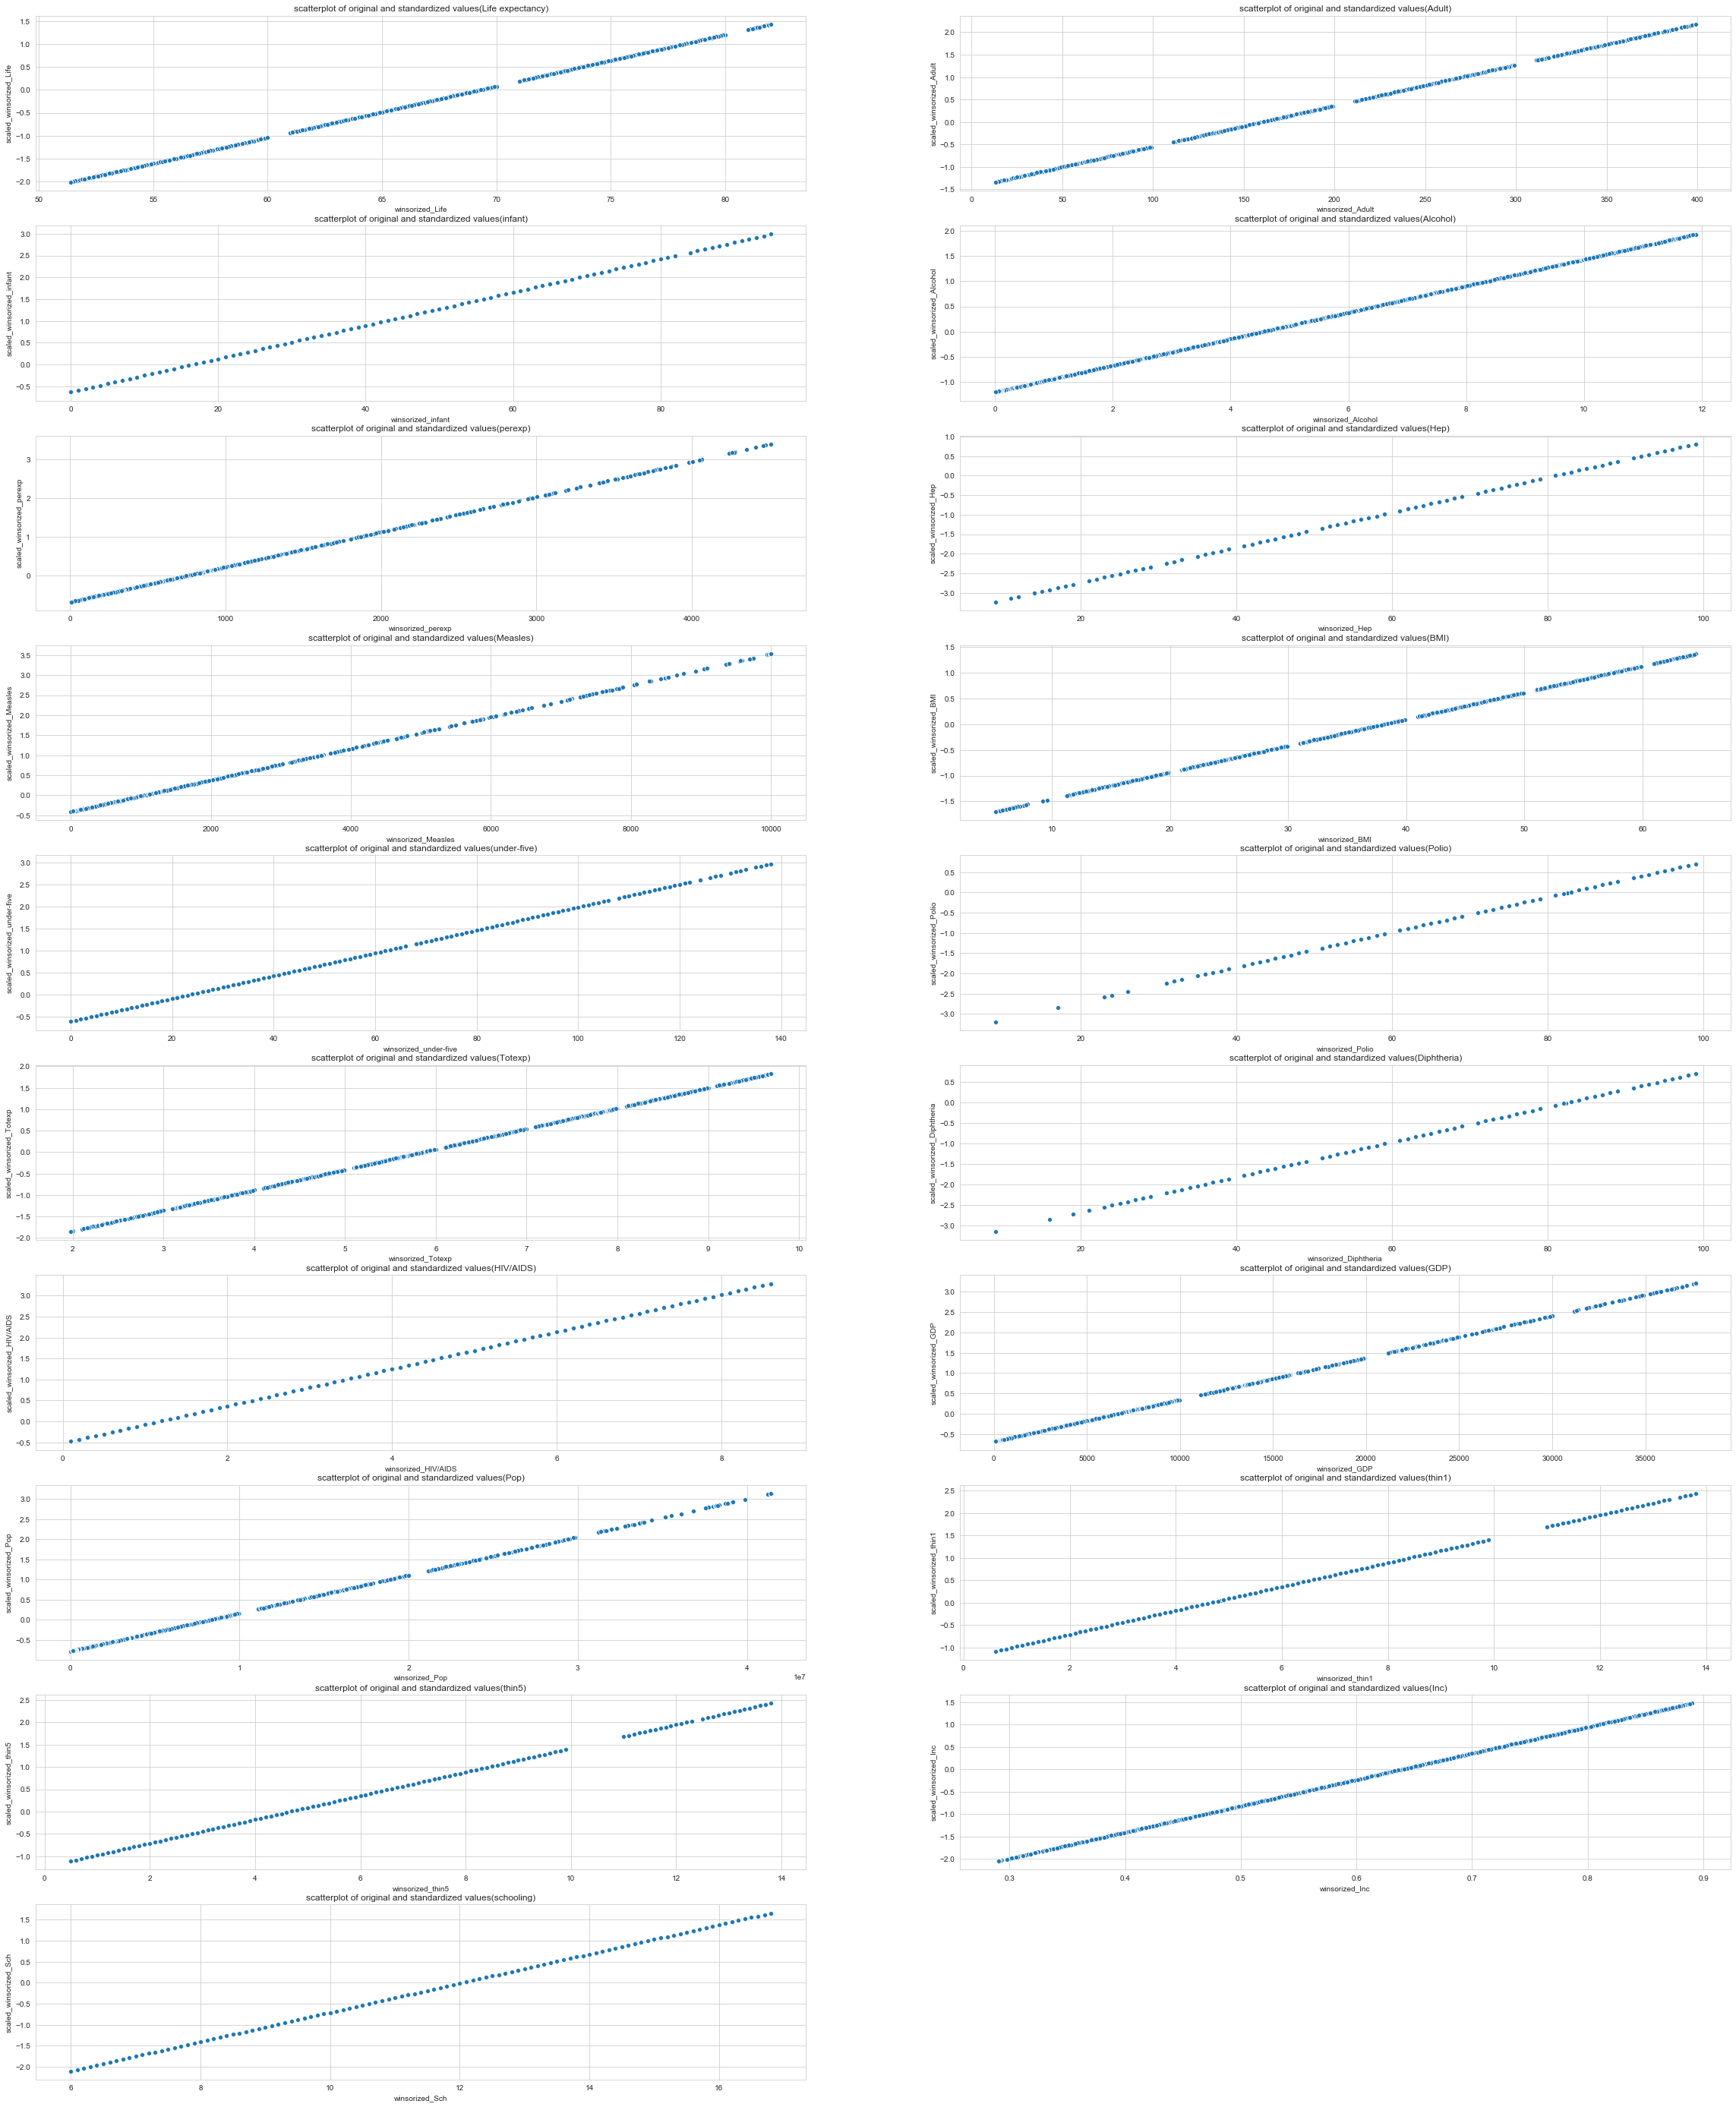

In [218]:
from sklearn.preprocessing import scale

# Standardizing the winsorized variables(rescaling)

life_expectancy_c["scaled_winsorized_Life"] = scale(life_expectancy_c["winsorized_Life"])
life_expectancy_c["scaled_winsorized_Adult"] = scale(life_expectancy_c["winsorized_Adult"])

life_expectancy_c["scaled_winsorized_infant"] =  scale(life_expectancy_c["winsorized_infant"])

life_expectancy_c["scaled_winsorized_Alcohol"] = scale(life_expectancy_c["winsorized_Alcohol"])

life_expectancy_c["scaled_winsorized_perexp"] = scale(life_expectancy_c["winsorized_perexp"])

life_expectancy_c["scaled_winsorized_Hep"] = scale(life_expectancy_c["winsorized_Hep"])

life_expectancy_c["scaled_winsorized_Measles"] = scale(life_expectancy_c["winsorized_Measles"])

life_expectancy_c["scaled_winsorized_BMI"]= scale(life_expectancy_c["winsorized_BMI"])

life_expectancy_c["scaled_winsorized_under-five"]= scale(life_expectancy_c["winsorized_under-five"])

life_expectancy_c["scaled_winsorized_Polio"]= scale(life_expectancy_c["winsorized_Polio"])

life_expectancy_c["scaled_winsorized_Totexp"]= scale(life_expectancy_c["winsorized_Totexp"])

life_expectancy_c["scaled_winsorized_Diphtheria"]= scale(life_expectancy_c["winsorized_Diphtheria"])

life_expectancy_c["scaled_winsorized_HIV/AIDS"]= scale(life_expectancy_c["winsorized_HIV/AIDS"])

life_expectancy_c["scaled_winsorized_GDP"]= scale(life_expectancy_c["winsorized_GDP"])

life_expectancy_c["scaled_winsorized_Pop"]= scale(life_expectancy_c["winsorized_Pop"])

life_expectancy_c["scaled_winsorized_thin1"]= scale(life_expectancy_c["winsorized_thin1"])

life_expectancy_c["scaled_winsorized_thin5"]= scale(life_expectancy_c["winsorized_thin5"])

life_expectancy_c["scaled_winsorized_Inc"]= scale(life_expectancy_c["winsorized_Inc"])

life_expectancy_c["scaled_winsorized_Sch"]= scale(life_expectancy_c["winsorized_Sch"])



plt.figure(figsize=(40,50))

# draw the scatter plot using seaborn for all the winsorized and scaled columns
plt.subplot(10,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Life"], life_expectancy_c["scaled_winsorized_Life"])
plt.title("scatterplot of original and standardized values(Life expectancy)")

plt.subplot(10,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Adult"], life_expectancy_c["scaled_winsorized_Adult"])
plt.title("scatterplot of original and standardized values(Adult)")

plt.subplot(10,2,3)
sns.scatterplot(life_expectancy_c["winsorized_infant"], life_expectancy_c["scaled_winsorized_infant"])
plt.title("scatterplot of original and standardized values(infant)")

plt.subplot(10,2,4)
sns.scatterplot(life_expectancy_c["winsorized_Alcohol"], life_expectancy_c["scaled_winsorized_Alcohol"])
plt.title("scatterplot of original and standardized values(Alcohol)")

plt.subplot(10,2,5)
sns.scatterplot(life_expectancy_c["winsorized_perexp"], life_expectancy_c["scaled_winsorized_perexp"])
plt.title("scatterplot of original and standardized values(perexp)")

plt.subplot(10,2,6)
sns.scatterplot(life_expectancy_c["winsorized_Hep"], life_expectancy_c["scaled_winsorized_Hep"])
plt.title("scatterplot of original and standardized values(Hep)")

plt.subplot(10,2,7)
sns.scatterplot(life_expectancy_c["winsorized_Measles"], life_expectancy_c["scaled_winsorized_Measles"])
plt.title("scatterplot of original and standardized values(Measles)")

plt.subplot(10,2,8)
sns.scatterplot(life_expectancy_c["winsorized_BMI"], life_expectancy_c["scaled_winsorized_BMI"])
plt.title("scatterplot of original and standardized values(BMI)")


plt.subplot(10,2,9)
sns.scatterplot(life_expectancy_c["winsorized_under-five"], life_expectancy_c["scaled_winsorized_under-five"])
plt.title("scatterplot of original and standardized values(under-five)")

plt.subplot(10,2,10)
sns.scatterplot(life_expectancy_c["winsorized_Polio"], life_expectancy_c["scaled_winsorized_Polio"])
plt.title("scatterplot of original and standardized values(Polio)")


plt.subplot(10,2,11)
sns.scatterplot(life_expectancy_c["winsorized_Totexp"], life_expectancy_c["scaled_winsorized_Totexp"])
plt.title("scatterplot of original and standardized values(Totexp)")


plt.subplot(10,2,12)
sns.scatterplot(life_expectancy_c["winsorized_Diphtheria"], life_expectancy_c["scaled_winsorized_Diphtheria"])
plt.title("scatterplot of original and standardized values(Diphtheria)")

plt.subplot(10,2,13)
sns.scatterplot(life_expectancy_c["winsorized_HIV/AIDS"], life_expectancy_c["scaled_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and standardized values(HIV/AIDS)")

plt.subplot(10,2,14)
sns.scatterplot(life_expectancy_c["winsorized_GDP"], life_expectancy_c["scaled_winsorized_GDP"])
plt.title("scatterplot of original and standardized values(GDP)")


plt.subplot(10,2,15)
sns.scatterplot(life_expectancy_c["winsorized_Pop"], life_expectancy_c["scaled_winsorized_Pop"])
plt.title("scatterplot of original and standardized values(Pop)")


plt.subplot(10,2,16)
sns.scatterplot(life_expectancy_c["winsorized_thin1"], life_expectancy_c["scaled_winsorized_thin1"])
plt.title("scatterplot of original and standardized values(thin1)")


plt.subplot(10,2,17)
sns.scatterplot(life_expectancy_c["winsorized_thin5"], life_expectancy_c["scaled_winsorized_thin5"])
plt.title("scatterplot of original and standardized values(thin5)")


plt.subplot(10,2,18)
sns.scatterplot(life_expectancy_c["winsorized_Inc"], life_expectancy_c["scaled_winsorized_Inc"])
plt.title("scatterplot of original and standardized values(Inc)")

plt.subplot(10,2,19)
sns.scatterplot(life_expectancy_c["winsorized_Sch"], life_expectancy_c["scaled_winsorized_Sch"])
plt.title("scatterplot of original and standardized values(schooling)")


plt.show()


### Dimensionality reduction: PCA

In [219]:
life_expectancy_c.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,scaled_winsorized_Polio,scaled_winsorized_Totexp,scaled_winsorized_Diphtheria,scaled_winsorized_HIV/AIDS,scaled_winsorized_GDP,scaled_winsorized_Pop,scaled_winsorized_thin1,scaled_winsorized_thin5,scaled_winsorized_Inc,scaled_winsorized_Sch
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044669,0.073568,0.090739,-0.081840,0.104094,-0.041980,...,0.094382,0.073920,0.134524,-0.115567,0.083305,0.041742,-0.046755,-0.046353,0.205682,0.198448
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.392420,0.385580,0.204566,-0.157586,0.562453,-0.222529,...,0.463608,0.227812,0.477770,-0.713769,0.474516,0.013084,-0.531418,-0.531750,0.789740,0.748563
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.190791,-0.237427,-0.139146,0.031176,-0.383641,0.094146,...,-0.274199,-0.116962,-0.274775,0.594015,-0.304671,-0.006769,0.349059,0.358280,-0.508086,-0.451109
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.114806,-0.091971,-0.179724,0.501038,-0.227427,0.996628,...,-0.171782,-0.139726,-0.176183,0.072746,-0.123498,0.254805,0.299030,0.298178,-0.174328,-0.213021
Alcohol,-0.044669,0.392420,-0.190791,-0.114806,1.000000,0.348026,0.074245,-0.051786,0.325939,-0.111781,...,0.214843,0.324401,0.216355,-0.091680,0.351555,-0.016978,-0.447247,-0.438424,0.476307,0.525754
percentage expenditure,0.073568,0.385580,-0.237427,-0.091971,0.348026,1.000000,0.014247,-0.057454,0.237435,-0.094674,...,0.150658,0.193558,0.144913,-0.159890,0.821983,0.000768,-0.278565,-0.284254,0.427387,0.398470
Hepatitis B,0.090739,0.204566,-0.139146,-0.179724,0.074245,0.014247,1.000000,-0.090827,0.139102,-0.185377,...,0.408905,0.067410,0.500311,-0.142606,0.069170,-0.042245,-0.091166,-0.095513,0.183045,0.188072
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.051786,-0.057454,-0.090827,1.000000,-0.176019,0.507718,...,-0.136775,-0.111957,-0.142879,0.080286,-0.075488,0.110348,0.184885,0.181962,-0.121398,-0.132611
BMI,0.104094,0.562453,-0.383641,-0.227427,0.325939,0.237435,0.139102,-0.176019,1.000000,-0.237833,...,0.285856,0.232576,0.284635,-0.385021,0.311938,-0.018749,-0.557504,-0.567865,0.554725,0.551717
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.111781,-0.094674,-0.185377,0.507718,-0.237833,1.000000,...,-0.189830,-0.141178,-0.196736,0.096543,-0.127824,0.255443,0.309146,0.307330,-0.192838,-0.228461


In [220]:

X = life_expectancy_c[["Schooling", "Income composition of resources",
                  "Adult Mortality"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
life_expectancy_c["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.71274173]


In [223]:
life_expectancy_c[["pca_1","Life expectancy","Schooling", "Income composition of resources",
                  "Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", 
                   "Hepatitis B", "Measles", "BMI", "under-five deaths", "Polio", "Total expenditure",
                   "Diphtheria", "HIV/AIDS", "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years"]].corr()

,pca_1,Life expectancy,Schooling,Income composition of resources,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years
pca_1,1.000000,-0.827107,-0.907345,-0.908392,0.699838,0.168761,-0.451002,-0.407812,-0.179805,0.111802,-0.550800,0.187944,-0.403748,-0.198828,-0.412568,0.370053,-0.460752,0.011923,0.462785,0.455519
Life expectancy,-0.827107,1.000000,0.718614,0.692621,-0.696359,-0.196557,0.392420,0.385580,0.204566,-0.157586,0.562453,-0.222529,0.462592,0.209628,0.476442,-0.556556,0.430551,-0.019629,-0.472778,-0.467231
Schooling,-0.907345,0.718614,1.000000,0.800046,-0.437255,-0.193232,0.498167,0.391132,0.165083,-0.123611,0.519223,-0.208674,0.384386,0.232252,0.388561,-0.220401,0.430930,-0.029849,-0.451644,-0.441199
Income composition of resources,-0.908392,0.692621,0.800046,1.000000,-0.440154,-0.143554,0.417014,0.386331,0.151143,-0.115678,0.482317,-0.161428,0.355871,0.149919,0.372226,-0.247345,0.440644,-0.007886,-0.406881,-0.395970
Adult Mortality,0.699838,-0.696359,-0.437255,-0.440154,1.000000,0.078756,-0.190791,-0.237427,-0.139146,0.031176,-0.383641,0.094146,-0.273295,-0.111772,-0.273602,0.523821,-0.277081,-0.012509,0.300262,0.305767
infant deaths,0.168761,-0.196557,-0.193232,-0.143554,0.078756,1.000000,-0.114806,-0.091971,-0.179724,0.501038,-0.227427,0.996628,-0.171049,-0.126769,-0.175524,0.024955,-0.107327,0.548547,0.465590,0.471229
Alcohol,-0.451002,0.392420,0.498167,0.417014,-0.190791,-0.114806,1.000000,0.348026,0.074245,-0.051786,0.325939,-0.111781,0.214038,0.300901,0.215578,-0.049719,0.318622,-0.030934,-0.420607,-0.409477
percentage expenditure,-0.407812,0.385580,0.391132,0.386331,-0.237427,-0.091971,0.348026,1.000000,0.014247,-0.057454,0.237435,-0.094674,0.149862,0.188503,0.144316,-0.110147,0.903299,-0.026404,-0.257935,-0.260383
Hepatitis B,-0.179805,0.204566,0.165083,0.151143,-0.139146,-0.179724,0.074245,0.014247,1.000000,-0.090827,0.139102,-0.185377,0.406308,0.060839,0.498359,-0.103061,0.062259,-0.110472,-0.106911,-0.110112
Measles,0.111802,-0.157586,-0.123611,-0.115678,0.031176,0.501038,-0.051786,-0.057454,-0.090827,1.000000,-0.176019,0.507718,-0.136440,-0.104730,-0.142154,0.030673,-0.068222,0.236236,0.224516,0.220774
